In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.prompt {min-width:70px;}
</style>
"""))

# 시작전 설정

In [2]:
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from matplotlib import font_manager
import matplotlib.font_manager as fm


# 시각화를 선명하게 표시되도록
%config InlineBackend.figure_format='retina'

# 차트 설정 
plt.rc("font", family="HYHeadLine-Medium")
#plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
font_manager._rebuild()


# 경고 메세지 안 보이게 
import warnings
# 모든 컬럼이 표시되도록 max_columns 의 수 지정
pd.options.display.max_columns = 50


Matplotlib is building the font cache; this may take a moment.


In [3]:
# 폰트 변경법

import matplotlib 
font_manager.fontManager.ttflist
matplotlib.font_manager._rebuild()
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/TypoSSiGothic140.ttf").get_name()
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2HDRM.TTF").get_name()
plt.rc('font', family=font_name)
#plt.rc("font", family="HYHeadLine-Medium")

# 데이터 로드

## 범죄원부 로우데이터 로드

In [4]:
df = pd.read_csv("./../data/범죄원부2017_2019.csv", sep=",",encoding='cp949')

## 데이터 확인 및 결측치 확인

In [5]:
df.shape

(9953, 42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9953 non-null   int64 
 1   작성년월              9953 non-null   int64 
 2   경찰서명(작성지관서)       9953 non-null   object
 3   발생 건수(전체)_건수      9953 non-null   int64 
 4   피해자 성별(남자)_건수     9953 non-null   int64 
 5   피해자 성별(여자)_건수     9953 non-null   int64 
 6   피해자 성별(불상)_건수     9953 non-null   int64 
 7   피해자 연령(6세이하)_건수   9953 non-null   int64 
 8   피해자 연령(12세이하)_건수  9953 non-null   int64 
 9   피해자 연령(15세이하)_건수  9953 non-null   int64 
 10  피해자 연령(20세이하)_건수  9953 non-null   int64 
 11  피해자 연령(30세이하)_건수  9953 non-null   int64 
 12  피해자 연령(40세이하)_건수  9953 non-null   int64 
 13  피해자 연령(50세이하)_건수  9953 non-null   int64 
 14  피해자 연령(60세이하)_건수  9953 non-null   int64 
 15  피해자 연령(60세초과)_건수  9953 non-null   int64 
 16  피해자 연령(미상)_건수     9953 non-null   int64 
 17  범죄유형(강력범죄)_건수 

In [7]:
df.isnull().sum()

Unnamed: 0          0
작성년월                0
경찰서명(작성지관서)         0
발생 건수(전체)_건수        0
피해자 성별(남자)_건수       0
피해자 성별(여자)_건수       0
피해자 성별(불상)_건수       0
피해자 연령(6세이하)_건수     0
피해자 연령(12세이하)_건수    0
피해자 연령(15세이하)_건수    0
피해자 연령(20세이하)_건수    0
피해자 연령(30세이하)_건수    0
피해자 연령(40세이하)_건수    0
피해자 연령(50세이하)_건수    0
피해자 연령(60세이하)_건수    0
피해자 연령(60세초과)_건수    0
피해자 연령(미상)_건수       0
범죄유형(강력범죄)_건수       0
범죄유형(폭력범죄)_건수       0
범죄유형(절도범죄)_건수       0
범죄유형(지능범죄)_건수       0
범죄유형(기타범죄)_건수       0
수사단서정보(고발)_건수       0
수사단서정보(고소)_건수       0
수사단서정보(진정)_건수       0
수사단서정보(탄원)_건수       0
수사단서정보(피해자신고)_건수    0
수사단서정보(타인신고)_건수     0
수사단서정보(탐문정보)_건수     0
수사단서정보(불심검문)_건수     0
수사단서정보(자수)_건수       0
수사단서정보(여죄)_건수       0
수사단서정보(변사체)_건수      0
수사단서정보(현행범)_건수      0
수사단서정보(기타)_건수       0
발생요일(일)_건수          0
발생요일(월)_건수          0
발생요일(화)_건수          0
발생요일(수)_건수          0
발생요일(목)_건수          0
발생요일(금)_건수          0
발생요일(토)_건수          0
dtype: int64

## 경찰서 관할 행정구역 로드

In [8]:
police_region = pd.read_csv("./../data/경찰서_행정구역.csv", sep=",",encoding='cp949')

In [9]:
police_region

,광역,기초,경찰서
0,강원,강릉시,강원강릉경찰서
1,강원,고성군,강원고성경찰서
2,강원,동해시,강원동해경찰서
3,강원,삼척시,강원삼척경찰서
4,강원,속초시,강원속초경찰서
...,...,...,...
282,충북,충주시,충북충주경찰서
283,충북,청주시,충북청주상당경찰서
284,충북,청주시,충북청주청원경찰서
285,충북,청주시,충북청주흥덕경찰서


# 전처리

## 분석에 필요한 컬럼만 가져오기
- 작성년월
- 경찰서명
- 피해자 남자수
- 피해자 여자수
- 피해자 불상수
- 피해자 연령 
- 범죄 유형
- 발생 요일

In [10]:
df[['작성년월','경찰서명(작성지관서)','피해자 성별(남자)_건수']]

,작성년월,경찰서명(작성지관서),피해자 성별(남자)_건수
0,201701,경기의왕경찰서,97
1,201701,경기의정부경찰서,454
2,201701,경기이천경찰서,156
3,201701,경기일산동부경찰서,411
4,201701,경기일산서부경찰서,249
...,...,...,...
9948,201912,충북충주경찰서,284
9949,201912,태안해양경비안전서,4
9950,201912,통영해양경비안전서,13
9951,201912,평택해양경비안전서,7


In [11]:
df2 = df[['작성년월',
'경찰서명(작성지관서)',
'피해자 성별(남자)_건수',
'피해자 성별(여자)_건수',
'피해자 성별(불상)_건수',
'피해자 연령(6세이하)_건수',
'피해자 연령(12세이하)_건수',
'피해자 연령(15세이하)_건수',
'피해자 연령(20세이하)_건수',
'피해자 연령(30세이하)_건수',
'피해자 연령(40세이하)_건수',
'피해자 연령(50세이하)_건수',
'피해자 연령(60세이하)_건수',
'피해자 연령(60세초과)_건수',
'피해자 연령(미상)_건수',
'범죄유형(강력범죄)_건수',
'범죄유형(폭력범죄)_건수',
'범죄유형(절도범죄)_건수',
'범죄유형(지능범죄)_건수',
'범죄유형(기타범죄)_건수',
'발생요일(일)_건수',
'발생요일(월)_건수',
'발생요일(화)_건수',
'발생요일(수)_건수',
'발생요일(목)_건수',
'발생요일(금)_건수',
'발생요일(토)_건수'
]]

In [12]:
df2.head()

,작성년월,경찰서명(작성지관서),피해자 성별(남자)_건수,피해자 성별(여자)_건수,피해자 성별(불상)_건수,피해자 연령(6세이하)_건수,피해자 연령(12세이하)_건수,피해자 연령(15세이하)_건수,피해자 연령(20세이하)_건수,피해자 연령(30세이하)_건수,피해자 연령(40세이하)_건수,피해자 연령(50세이하)_건수,피해자 연령(60세이하)_건수,피해자 연령(60세초과)_건수,피해자 연령(미상)_건수,범죄유형(강력범죄)_건수,범죄유형(폭력범죄)_건수,범죄유형(절도범죄)_건수,범죄유형(지능범죄)_건수,범죄유형(기타범죄)_건수,발생요일(일)_건수,발생요일(월)_건수,발생요일(화)_건수,발생요일(수)_건수,발생요일(목)_건수,발생요일(금)_건수,발생요일(토)_건수
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,29,32,29,28,32,25
1,201701,경기의정부경찰서,454,332,297,4,7,9,62,145,142,167,154,94,299,9,241,106,216,511,135,147,154,169,150,171,157
2,201701,경기이천경찰서,156,89,184,0,4,5,23,55,38,46,52,21,185,3,65,15,59,287,68,66,60,65,60,52,58
3,201701,경기일산동부경찰서,411,265,210,3,4,6,31,123,143,180,127,59,210,14,143,79,157,493,102,117,134,137,124,143,129
4,201701,경기일산서부경찰서,249,142,113,1,2,4,19,67,74,92,76,55,114,7,67,40,75,315,49,70,74,66,85,87,73


## 칼럼 이름 바꾸기

In [13]:
df2.columns = ['발생년월','경찰서','피해자(남자)','피해자(여자)','성별미상',
'00~06세','07~12세','13~15세','16~20세','21~30세','31~40세','41~50세','51~60세','61~세','나이미상',
'강력','폭력','절도','지능','기타',
'일','월','화','수','목','금','토']

In [14]:
df2.head()

,발생년월,경찰서,피해자(남자),피해자(여자),성별미상,00~06세,07~12세,13~15세,16~20세,21~30세,31~40세,41~50세,51~60세,61~세,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,29,32,29,28,32,25
1,201701,경기의정부경찰서,454,332,297,4,7,9,62,145,142,167,154,94,299,9,241,106,216,511,135,147,154,169,150,171,157
2,201701,경기이천경찰서,156,89,184,0,4,5,23,55,38,46,52,21,185,3,65,15,59,287,68,66,60,65,60,52,58
3,201701,경기일산동부경찰서,411,265,210,3,4,6,31,123,143,180,127,59,210,14,143,79,157,493,102,117,134,137,124,143,129
4,201701,경기일산서부경찰서,249,142,113,1,2,4,19,67,74,92,76,55,114,7,67,40,75,315,49,70,74,66,85,87,73


## 행정구역과 조인

In [15]:
df3 = pd.merge(df2, police_region)


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10169 entries, 0 to 10168
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   발생년월     10169 non-null  int64 
 1   경찰서      10169 non-null  object
 2   피해자(남자)  10169 non-null  int64 
 3   피해자(여자)  10169 non-null  int64 
 4   성별미상     10169 non-null  int64 
 5   00~06세   10169 non-null  int64 
 6   07~12세   10169 non-null  int64 
 7   13~15세   10169 non-null  int64 
 8   16~20세   10169 non-null  int64 
 9   21~30세   10169 non-null  int64 
 10  31~40세   10169 non-null  int64 
 11  41~50세   10169 non-null  int64 
 12  51~60세   10169 non-null  int64 
 13  61~세     10169 non-null  int64 
 14  나이미상     10169 non-null  int64 
 15  강력       10169 non-null  int64 
 16  폭력       10169 non-null  int64 
 17  절도       10169 non-null  int64 
 18  지능       10169 non-null  int64 
 19  기타       10169 non-null  int64 
 20  일        10169 non-null  int64 
 21  월        10169 non-null  int64 
 22

In [17]:
df3['광역'].unique()

array(['경기', '경남', '경북', '광주', '전북', '대구', '대전', '강원', '전남', '충남', '부산',
       '제주', '서울', '울산', '인천', '세종', '충북'], dtype=object)

## 작성년, 작성월 칼럼 추가

In [18]:
df3['년도'] = df3['발생년월']//100
df3['월'] = df3['발생년월']%100
df3['총피해자'] = df3['피해자(남자)']+df3['피해자(여자)']+df3['성별미상']
#'abc'[1:2]

In [19]:
df3

,발생년월,경찰서,피해자(남자),피해자(여자),성별미상,00~06세,07~12세,13~15세,16~20세,21~30세,31~40세,41~50세,51~60세,61~세,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토,광역,기초,년도,총피해자
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,1,32,29,28,32,25,경기,의왕시,2017,205
1,201702,경기의왕경찰서,123,65,62,1,2,2,6,17,42,46,46,26,62,5,30,18,42,155,30,2,45,37,37,33,39,경기,의왕시,2017,250
2,201703,경기의왕경찰서,135,68,100,0,1,1,9,27,39,51,53,22,100,3,45,11,48,196,38,3,51,45,44,48,34,경기,의왕시,2017,303
3,201704,경기의왕경찰서,119,74,95,3,1,6,13,27,37,40,47,19,95,5,48,22,36,177,33,4,38,36,46,53,41,경기,의왕시,2017,288
4,201705,경기의왕경찰서,103,45,84,0,2,0,7,26,35,29,37,12,84,1,25,13,42,151,39,5,32,31,34,30,28,경기,의왕시,2017,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164,201908,경기화성동탄경찰서,443,246,184,9,13,16,36,133,174,156,110,41,185,14,220,99,150,390,86,8,130,138,122,128,124,경기,화성시,2019,873
10165,201909,경기화성동탄경찰서,449,271,244,5,7,15,41,148,146,177,119,61,245,17,192,102,202,451,95,9,155,143,153,160,115,경기,화성시,2019,964
10166,201910,경기화성동탄경찰서,443,292,292,3,12,16,40,129,169,176,133,56,293,15,191,92,216,513,88,10,188,163,153,154,147,경기,화성시,2019,1027
10167,201911,경기화성동탄경찰서,556,325,228,2,17,16,44,153,206,195,158,87,231,11,204,134,327,433,113,11,189,157,180,177,135,경기,화성시,2019,1109


In [20]:
df_metro = df3.groupby(['광역']).sum().sort_values(by=['총피해자'],ascending=False)/1000



## 시각화

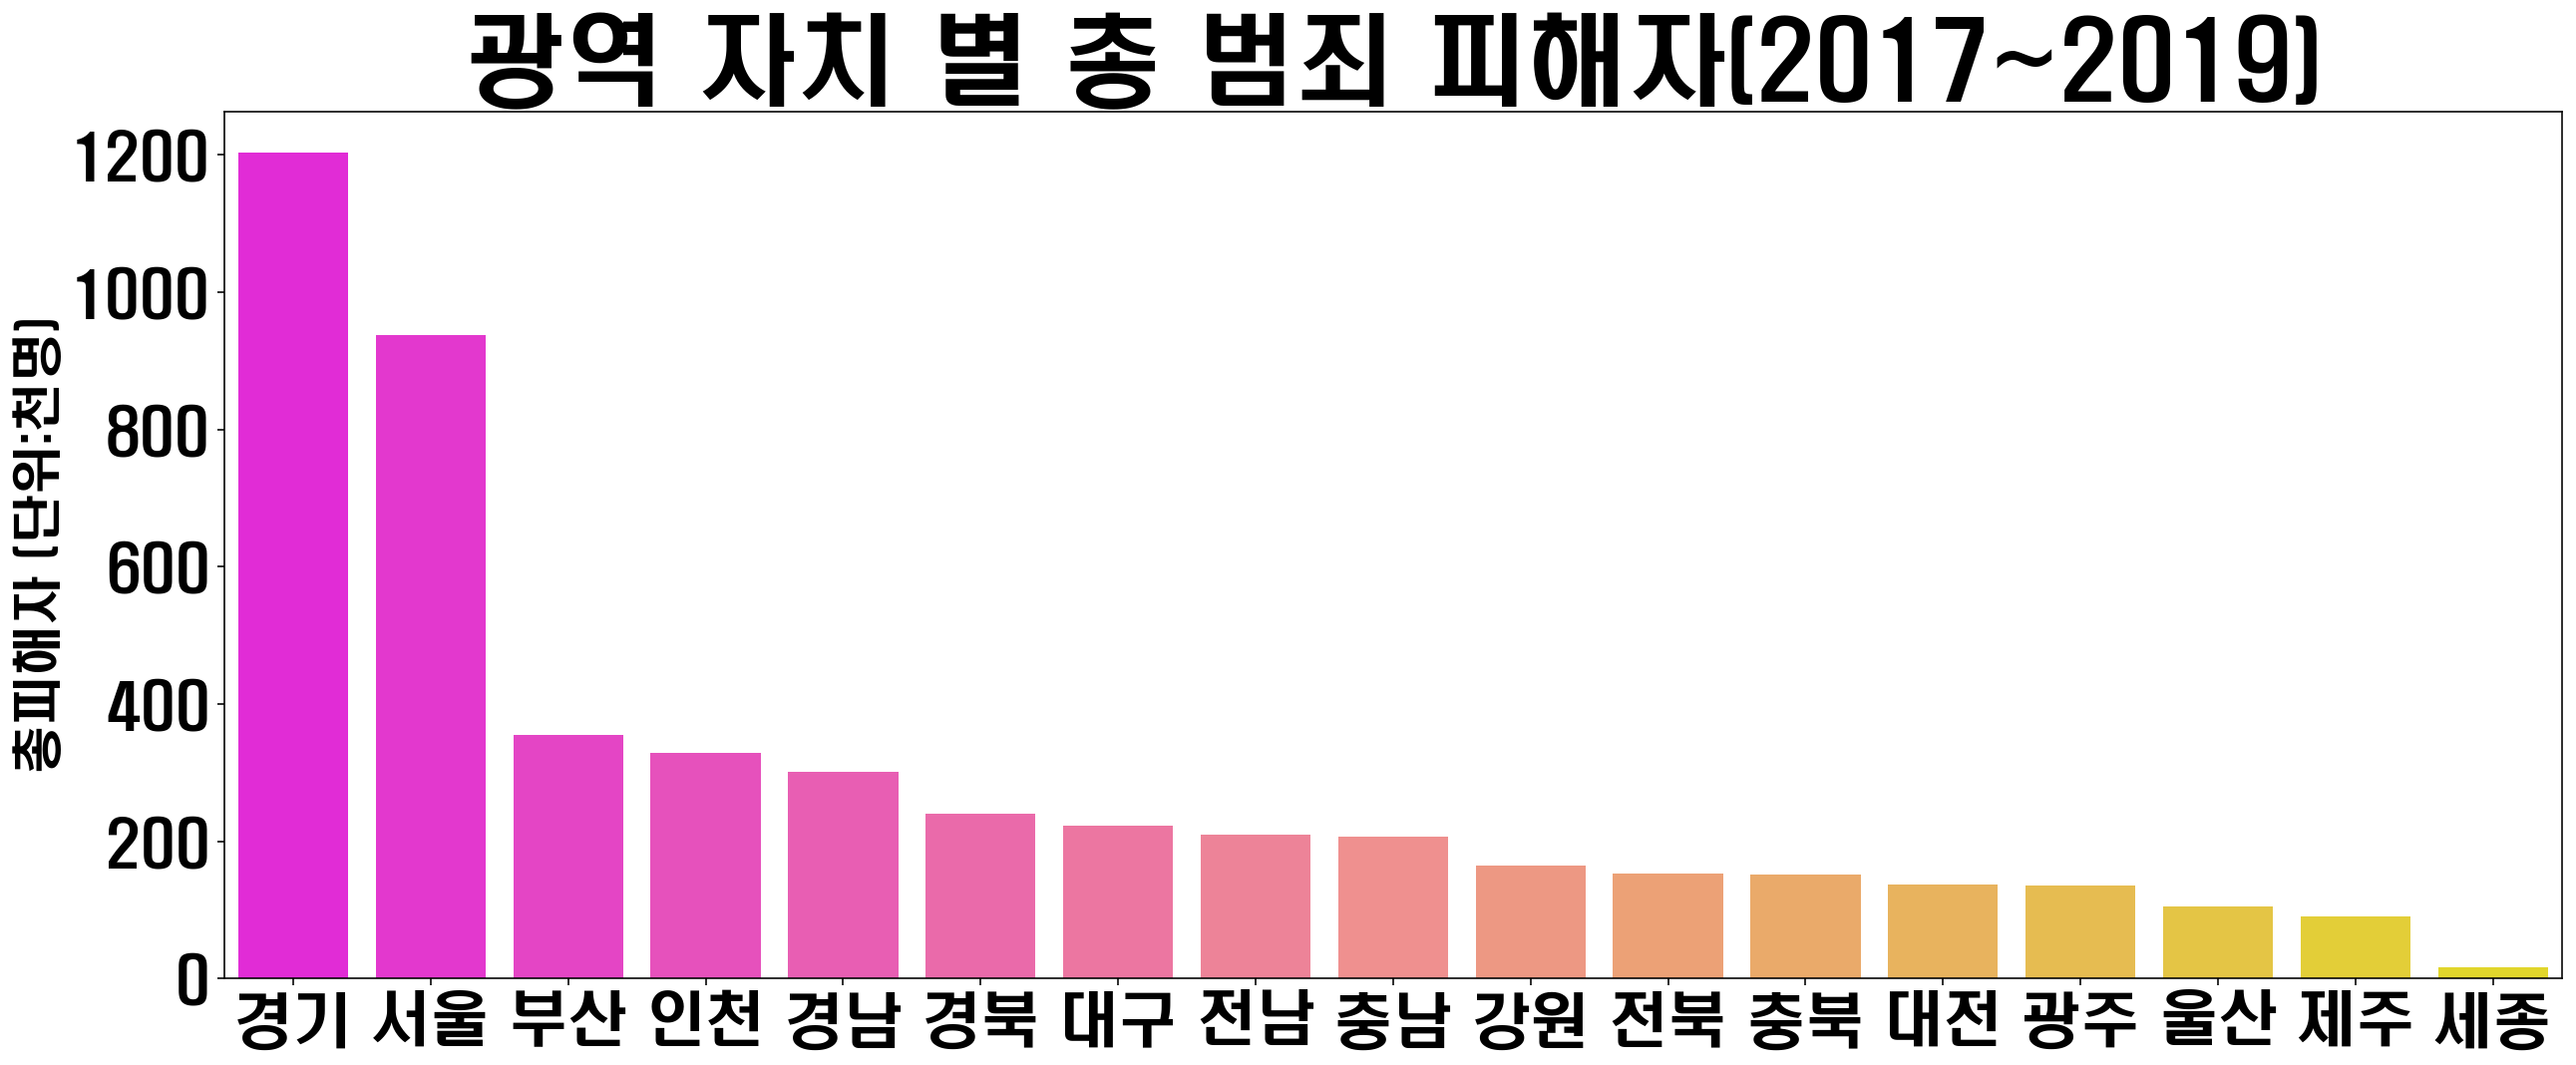

In [21]:
plt.figure(figsize=(21,8))
plt.title('광역 자치 별 총 범죄 피해자(2017~2019)', fontsize=50)

b=sns.barplot(data=df_metro, x=df_metro.index,y='총피해자',palette='spring')
#plt.rc('xtick', labelsize=25)
#plt.rc('ytick', labelsize=25)

b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('', fontsize=25)
b.set_ylabel('총피해자 (단위:천명)', fontsize=25)
plt.savefig('3-5.png')

In [22]:
df_metro2 = df3.groupby(['광역','년도']).sum().sort_values(by=['광역','년도','총피해자'])/1000
df_metro2 = df_metro2.reset_index()
df_metro2 = df_metro2[['광역','년도','총피해자']]

In [23]:
df_metro2.head()

,광역,년도,총피해자
0,강원,2017,59.670
1,강원,2018,51.950
2,강원,2019,53.003
3,경기,2017,417.970
4,경기,2018,390.175


In [24]:
df_metro2_pivot = df_metro2.pivot(index='광역', columns='년도', values='총피해자')



In [25]:
df_metro2_pivot

년도,2017,2018,2019
광역,,,
강원,59.670,51.950,53.003
경기,417.970,390.175,395.318
경남,104.281,94.904,101.820
경북,81.129,78.056,81.468
광주,48.163,43.482,44.231
대구,74.932,72.265,75.749
대전,46.944,45.429,45.110
부산,119.763,115.925,118.578
서울,319.875,308.504,308.989


In [26]:
df_metro2_pivot.columns=[2017,2018,2019]

In [27]:
df_metro2_pivot[[2017]]


,2017
광역,
강원,59.670
경기,417.970
경남,104.281
경북,81.129
광주,48.163
대구,74.932
대전,46.944
부산,119.763
서울,319.875


## 시각화 년도 누적

<Figure size 1512x576 with 0 Axes>

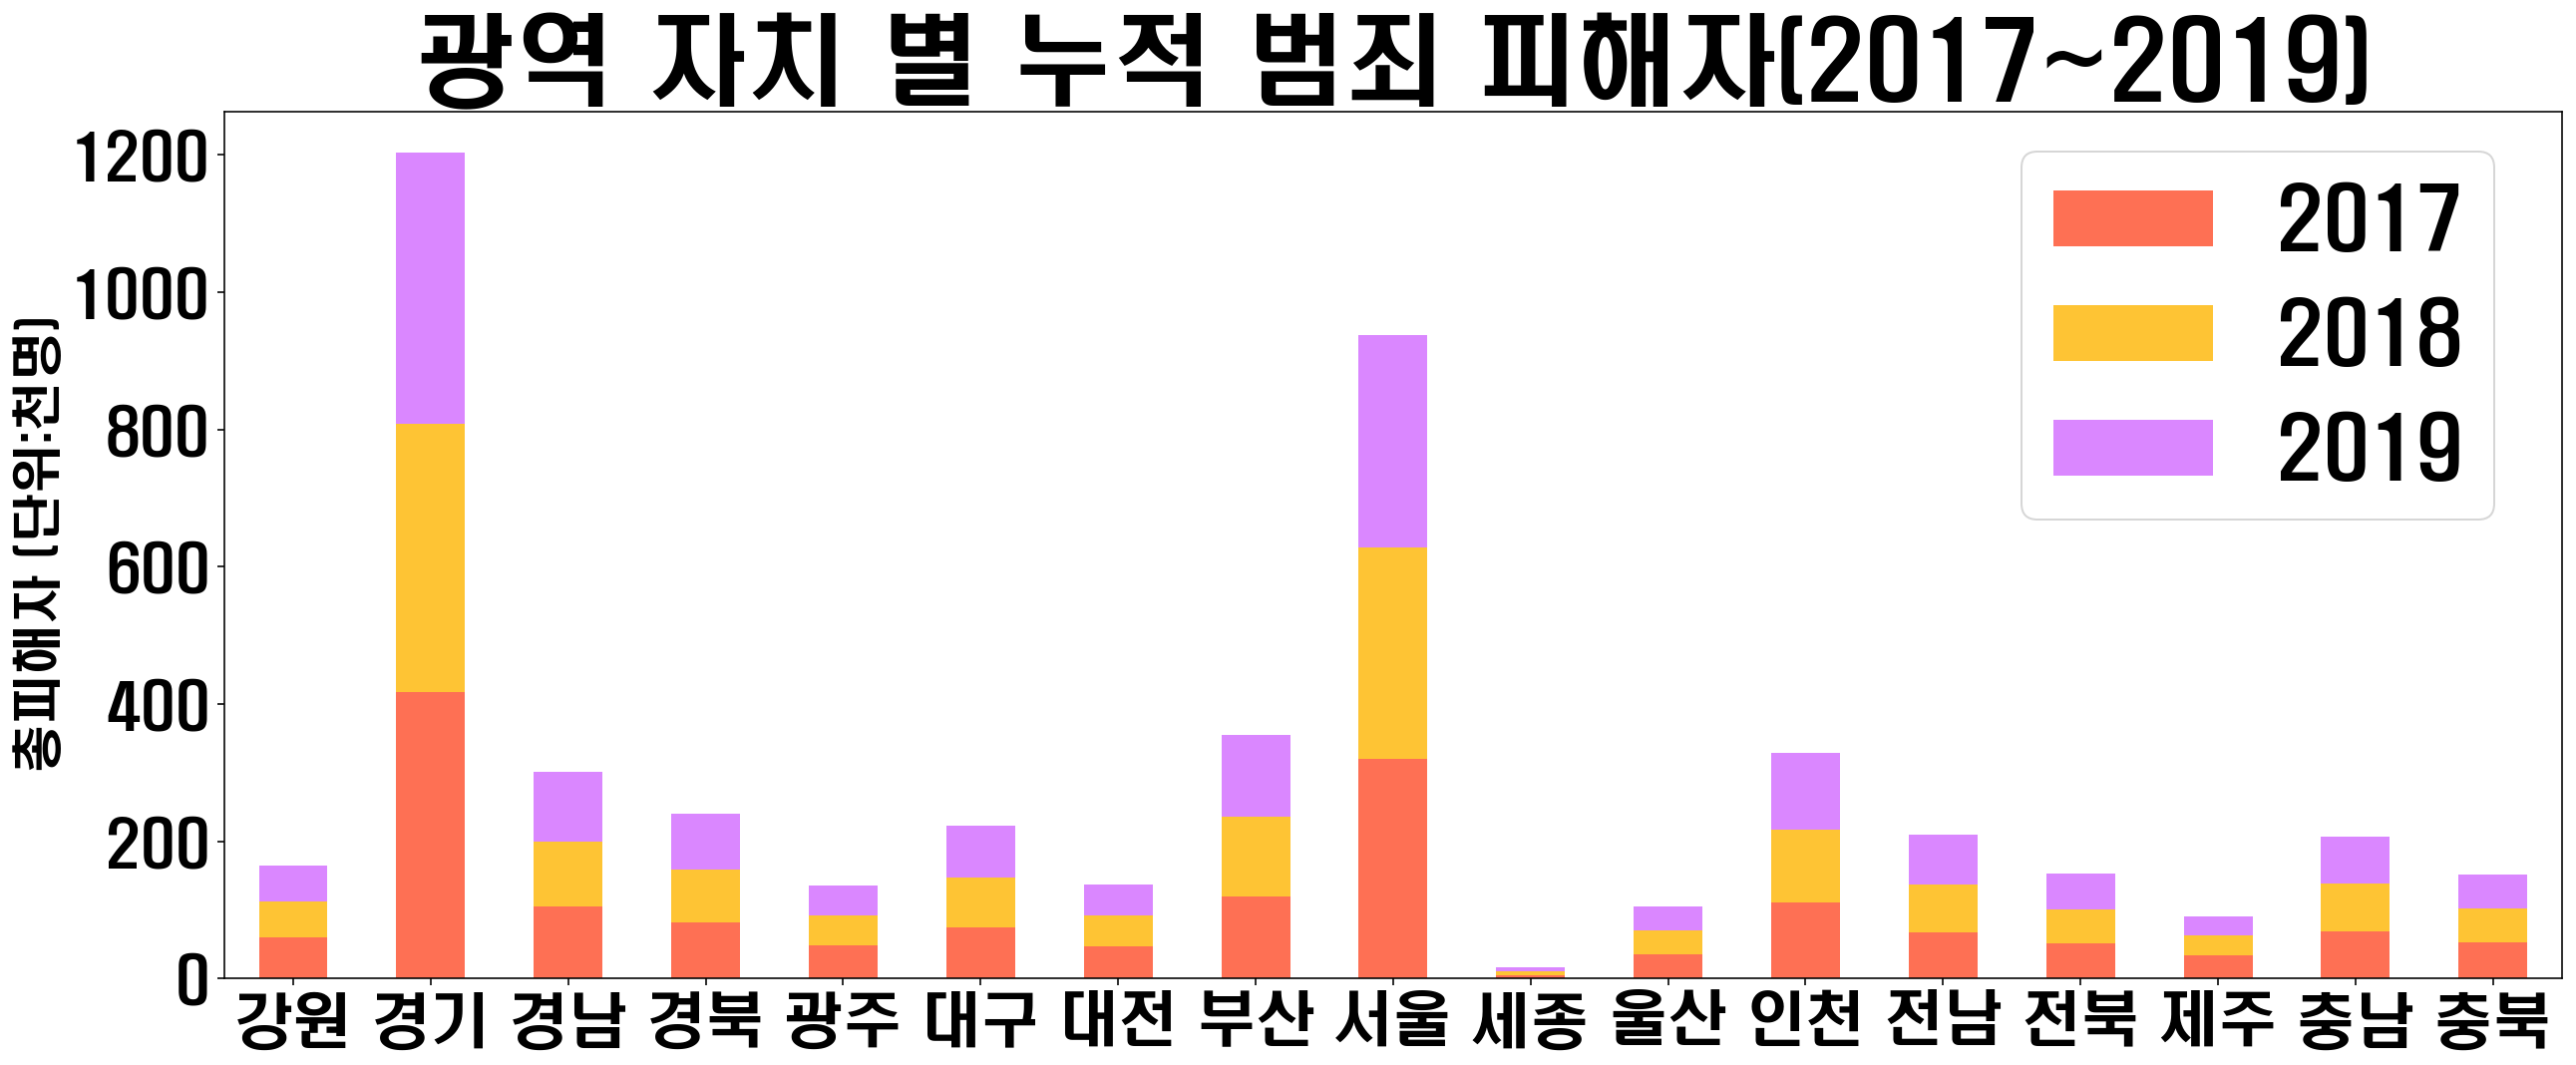

In [115]:
plt.figure(figsize=(21,8))

#plt.rc('xtick', labelsize=25)
#plt.rc('ytick', labelsize=25)
plt.rcParams["figure.figsize"] = (21,8)

b=df_metro2_pivot.plot(kind='bar',stacked=True,color=['#fe7054','#fec434','#da87ff'])

plt.title('광역 자치 별 누적 범죄 피해자(2017~2019)', fontsize=50)
plt.legend(loc='upper center', bbox_to_anchor=(0.87, 1), ncol=1,prop={'size': 40})
b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('', fontsize=25)
plt.setp(b.get_xticklabels(), rotation=0)
b.set_ylabel('총피해자 (단위:천명)', fontsize=25)
plt.savefig('3-6.png')

# 전체 인구 대비 피해자 발생율

## 전체 인구 로드

In [29]:
df4 = pd.read_csv("./../data/지역나이인구.csv", sep=",",encoding='cp949')

## 지역기준 인구/피해자 비율

### 필요한 칼럼만 남김

In [30]:
df_421 = df4[['년도','광역','기초','경찰서','인구수']]

### 지역별 인구수 데이터셋 작업

In [31]:
#성별 데이터 부분합
df_422 = df_421.groupby(['년도','광역','기초','경찰서']).sum().sort_values(by=['년도','광역','기초','경찰서']).reset_index()

### 지역별 피해자수 데이터셋 

In [32]:
df4

,년도,광역,기초,시구only,경찰서,연령,항목,인구수
0,2017,강원,강릉시,강릉시,강원강릉경찰서,00~06세,남,5104
1,2017,강원,강릉시,강릉시,강원강릉경찰서,00~06세,여,4785
2,2017,강원,강릉시,강릉시,강원강릉경찰서,13~15세,남,3189
3,2017,강원,강릉시,강릉시,강원강릉경찰서,13~15세,여,2887
4,2017,강원,강릉시,강릉시,강원강릉경찰서,16~20세,남,8574
...,...,...,...,...,...,...,...,...
13495,2019,세종,세종시,세종시,충남세종경찰서,51~60세,여,19386
13496,2019,세종,세종시,세종시,충남세종경찰서,61~세,남,19373
13497,2019,세종,세종시,세종시,충남세종경찰서,61~세,여,23403
13498,2019,세종,세종시,세종시,충남세종경찰서,07~12세,남,14400


In [33]:
df3.head()

,발생년월,경찰서,피해자(남자),피해자(여자),성별미상,00~06세,07~12세,13~15세,16~20세,21~30세,31~40세,41~50세,51~60세,61~세,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토,광역,기초,년도,총피해자
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,1,32,29,28,32,25,경기,의왕시,2017,205
1,201702,경기의왕경찰서,123,65,62,1,2,2,6,17,42,46,46,26,62,5,30,18,42,155,30,2,45,37,37,33,39,경기,의왕시,2017,250
2,201703,경기의왕경찰서,135,68,100,0,1,1,9,27,39,51,53,22,100,3,45,11,48,196,38,3,51,45,44,48,34,경기,의왕시,2017,303
3,201704,경기의왕경찰서,119,74,95,3,1,6,13,27,37,40,47,19,95,5,48,22,36,177,33,4,38,36,46,53,41,경기,의왕시,2017,288
4,201705,경기의왕경찰서,103,45,84,0,2,0,7,26,35,29,37,12,84,1,25,13,42,151,39,5,32,31,34,30,28,경기,의왕시,2017,232


In [34]:
df_4231 = df3[['년도','광역','기초','경찰서','00~06세']]
df_4232 = df3[['년도','광역','기초','경찰서','07~12세']]
df_4233 = df3[['년도','광역','기초','경찰서','13~15세']]
df_4234 = df3[['년도','광역','기초','경찰서','16~20세']]
df_4235 = df3[['년도','광역','기초','경찰서','21~30세']]
df_4236 = df3[['년도','광역','기초','경찰서','31~40세']]
df_4237 = df3[['년도','광역','기초','경찰서','41~50세']]
df_4238 = df3[['년도','광역','기초','경찰서','51~60세']]
df_4239 = df3[['년도','광역','기초','경찰서','61~세']]
df_4230 = df3[['년도','광역','기초','경찰서','나이미상']]

df_4231['연령'] = '00~06세'
df_4232['연령'] = '07~12세'
df_4233['연령'] = '13~15세'
df_4234['연령'] = '16~20세'
df_4235['연령'] = '21~30세'
df_4236['연령'] = '31~40세'
df_4237['연령'] = '41~50세'
df_4238['연령'] = '51~60세'
df_4239['연령'] = '61~세'
df_4230['연령'] = '나이미상'

df_4231.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4232.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4233.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4234.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4235.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4236.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4237.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4238.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4239.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4230.columns = ['년도','광역','기초','경찰서','발생건수','연령']


<ipython-input-34-24ba7093fa5e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4231['연령'] = '00~06세'
<ipython-input-34-24ba7093fa5e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4232['연령'] = '07~12세'
<ipython-input-34-24ba7093fa5e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [35]:
df_423 = pd.concat([df_4231,df_4232,df_4233,df_4234,df_4235,df_4236,df_4237,df_4238,df_4239,df_4230],axis=0)
df_444 = df_423

In [36]:
df_423

,년도,광역,기초,경찰서,발생건수,연령
0,2017,경기,의왕시,경기의왕경찰서,0,00~06세
1,2017,경기,의왕시,경기의왕경찰서,1,00~06세
2,2017,경기,의왕시,경기의왕경찰서,0,00~06세
3,2017,경기,의왕시,경기의왕경찰서,3,00~06세
4,2017,경기,의왕시,경기의왕경찰서,0,00~06세
...,...,...,...,...,...,...
10164,2019,경기,화성시,경기화성동탄경찰서,185,나이미상
10165,2019,경기,화성시,경기화성동탄경찰서,245,나이미상
10166,2019,경기,화성시,경기화성동탄경찰서,293,나이미상
10167,2019,경기,화성시,경기화성동탄경찰서,231,나이미상


In [37]:
#df_metro = df3.groupby(['광역']).sum().sort_values(by=['총피해자'],ascending=False)/1000
df_423 = df_423.groupby(['년도','광역','기초','경찰서']).sum().sort_values(by=['년도','광역','기초','경찰서']).reset_index()


### 인구수, 피해자수 로우 데이터 조인

In [38]:
#df_metro2_pivot = df_metro2.pivot(index='광역', columns='작성년', values='총피해자')
df_424 = pd.merge(df_422, df_423)

In [39]:
df_424

,년도,광역,기초,경찰서,인구수,발생건수
0,2017,강원,강릉시,강원강릉경찰서,215914,6864
1,2017,강원,고성군,강원고성경찰서,81060,962
2,2017,강원,동해시,강원동해경찰서,89151,2868
3,2017,강원,삼척시,강원삼척경찰서,67860,2600
4,2017,강원,속초시,강원속초경찰서,78618,4749
...,...,...,...,...,...,...
559,2019,충북,영동군,충북영동경찰서,48004,1002
560,2019,충북,옥천군,충북옥천경찰서,49117,1176
561,2019,충북,음성군,충북음성경찰서,104823,3653
562,2019,충북,증평군,충북괴산경찰서,37493,1924


### 지역기준 인구/피해자 부분합

In [40]:
df_425 = df_424.groupby(['광역'])['광역','발생건수','인구수'].sum().sort_values(by=['광역']).reset_index()

<ipython-input-40-17dffffc8416>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_425 = df_424.groupby(['광역'])['광역','발생건수','인구수'].sum().sort_values(by=['광역']).reset_index()


In [41]:
# 형법 범죄율 정의
df_425['범죄피해율'] = round(df_425['발생건수'] * 100000 / df_425['인구수'],2)

In [42]:
df_425=df_425.sort_values(by=['범죄피해율'],ascending=False)

In [43]:
df_425

,광역,발생건수,인구수,범죄피해율
14,제주,22170,522068,4246.57
12,전남,182667,5262570,3471.06
0,강원,157097,4717008,3330.44
7,부산,201543,6283547,3207.47
16,충북,40621,1269935,3198.67
15,충남,200160,6532491,3064.07
11,인천,114025,3842088,2967.79
8,서울,581803,19798956,2938.55
1,경기,888244,30694142,2893.86
3,경북,184458,6504762,2835.74


### 시각화

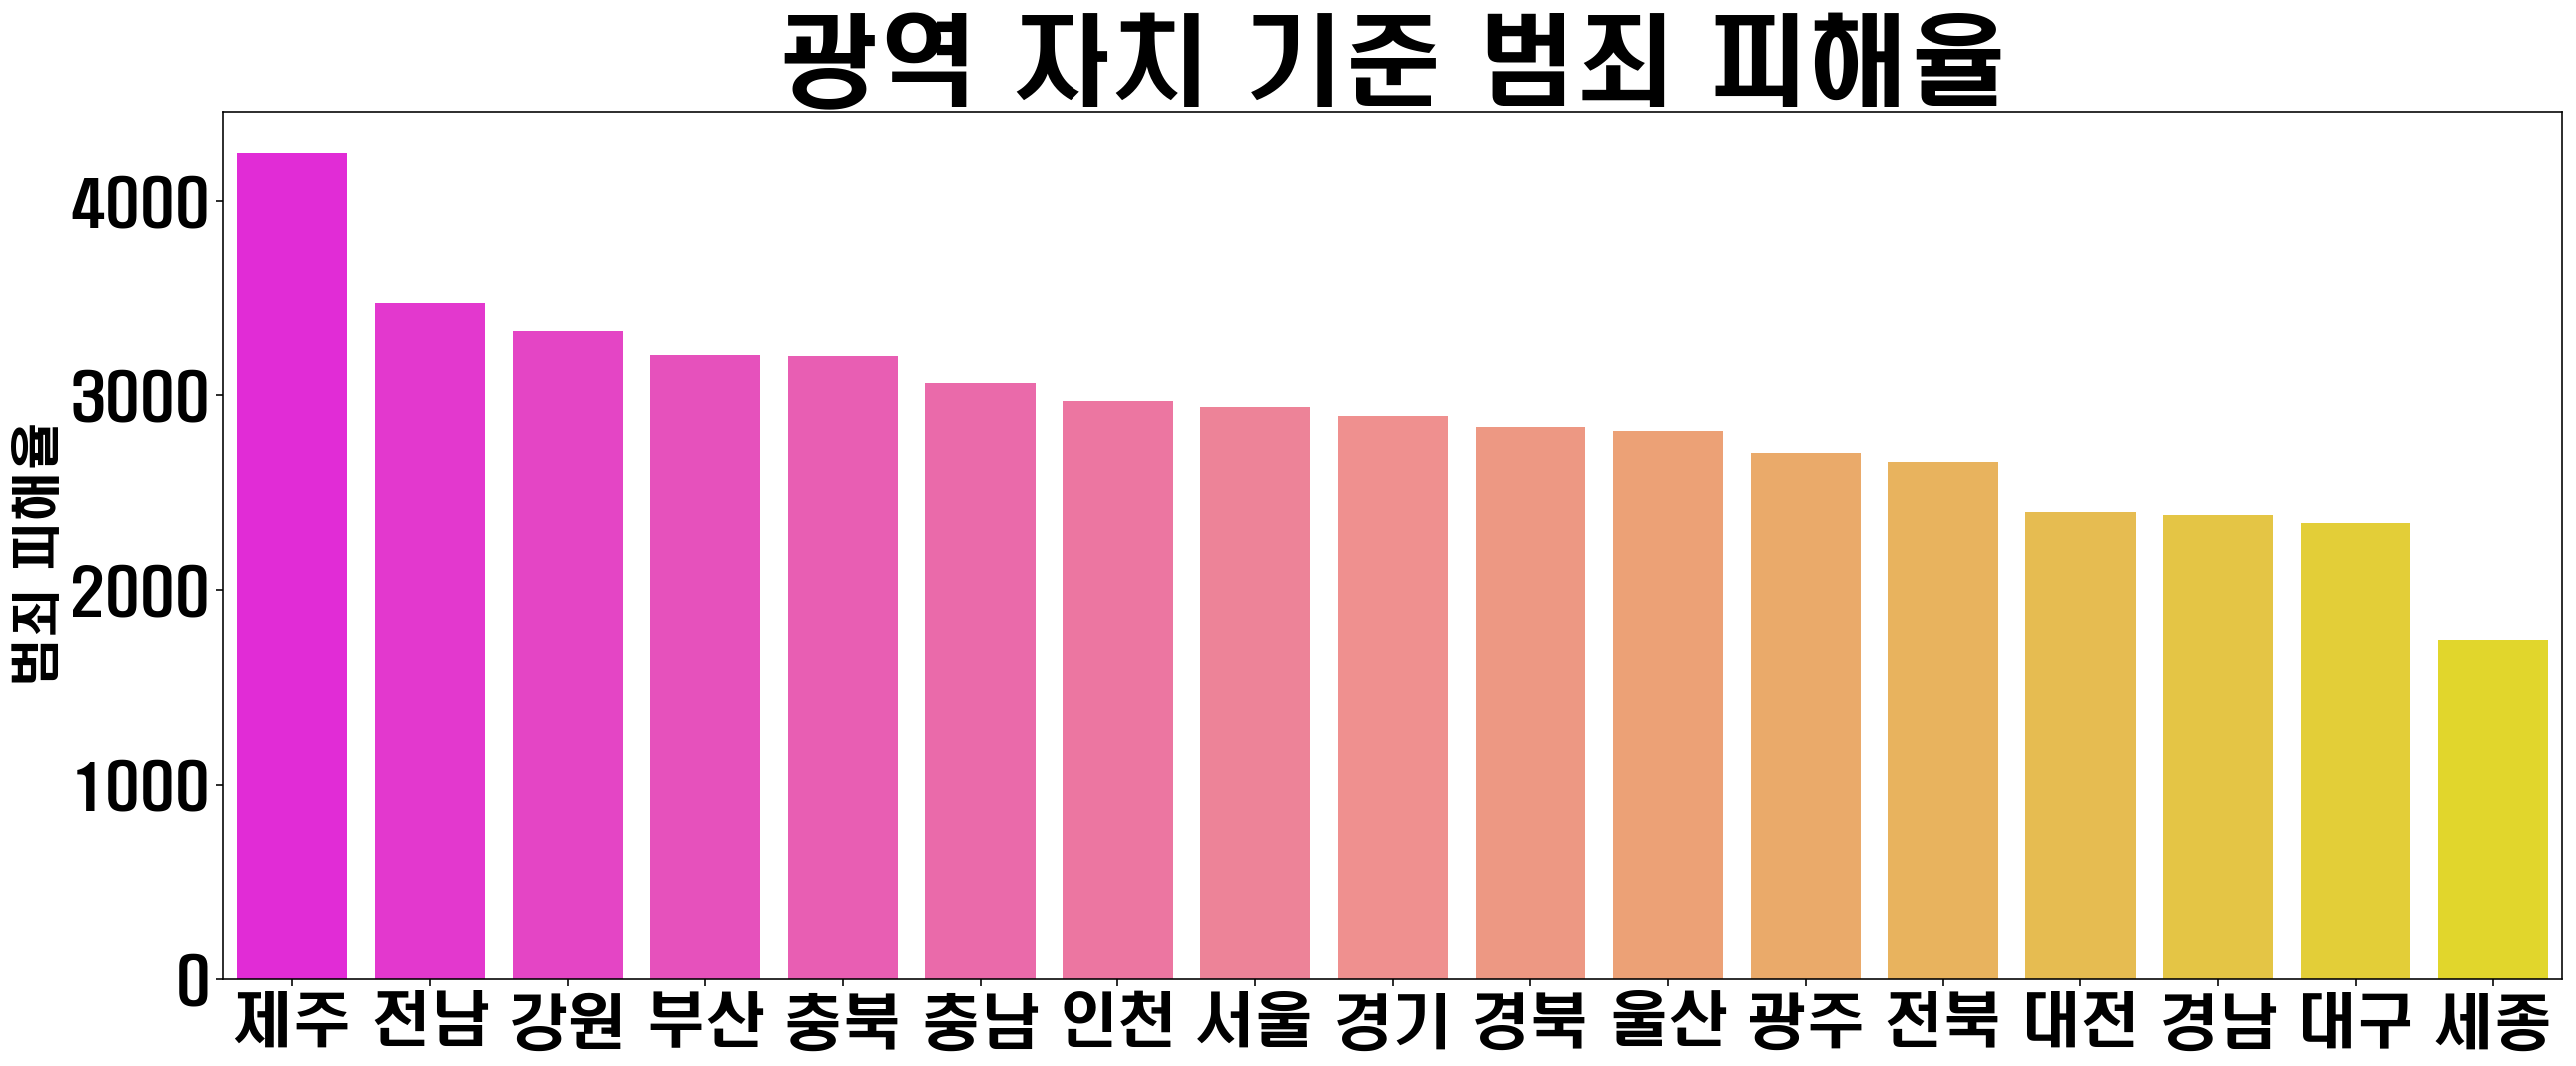

In [44]:
plt.figure(figsize=(21,8))
plt.title('광역 자치 기준 범죄 피해율', fontsize=50)
#plt.rc('xtick', labelsize=25)
#plt.rc('ytick', labelsize=25)

b=sns.barplot(data=df_425, x='광역',y='범죄피해율',palette='spring')

b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('', fontsize=25)
b.set_ylabel('범죄 피해율 ', fontsize=25)

#Typo_SSiGothic140

plt.savefig('4-2-6.png')

## 광역 자치 범죄 유형별 피해자 비율

### 연령/성별 기준 피해자수 데이터셋

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10169 entries, 0 to 10168
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   발생년월     10169 non-null  int64 
 1   경찰서      10169 non-null  object
 2   피해자(남자)  10169 non-null  int64 
 3   피해자(여자)  10169 non-null  int64 
 4   성별미상     10169 non-null  int64 
 5   00~06세   10169 non-null  int64 
 6   07~12세   10169 non-null  int64 
 7   13~15세   10169 non-null  int64 
 8   16~20세   10169 non-null  int64 
 9   21~30세   10169 non-null  int64 
 10  31~40세   10169 non-null  int64 
 11  41~50세   10169 non-null  int64 
 12  51~60세   10169 non-null  int64 
 13  61~세     10169 non-null  int64 
 14  나이미상     10169 non-null  int64 
 15  강력       10169 non-null  int64 
 16  폭력       10169 non-null  int64 
 17  절도       10169 non-null  int64 
 18  지능       10169 non-null  int64 
 19  기타       10169 non-null  int64 
 20  일        10169 non-null  int64 
 21  월        10169 non-null  int64 
 22

In [46]:
df_4311 = df3[['광역','경찰서','강력']]
df_4312 = df3[['광역','경찰서','폭력']]
df_4313 = df3[['광역','경찰서','절도']]
df_4314 = df3[['광역','경찰서','지능']]
df_4315 = df3[['광역','경찰서','기타']]

df_4311['범죄 유형'] = '강력'
df_4312['범죄 유형'] = '폭력'
df_4313['범죄 유형'] = '절도'
df_4314['범죄 유형'] = '지능'
df_4315['범죄 유형'] = '기타'

df_4311.columns = ['광역','경찰서','피해자(명)','범죄 유형']
df_4312.columns = ['광역','경찰서','피해자(명)','범죄 유형']
df_4313.columns = ['광역','경찰서','피해자(명)','범죄 유형']
df_4314.columns = ['광역','경찰서','피해자(명)','범죄 유형']
df_4315.columns = ['광역','경찰서','피해자(명)','범죄 유형']

<ipython-input-46-fbbf1a49793f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4311['범죄 유형'] = '강력'
<ipython-input-46-fbbf1a49793f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4312['범죄 유형'] = '폭력'
<ipython-input-46-fbbf1a49793f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [47]:
df_431 = pd.concat([df_4311,df_4312,df_4313,df_4314,df_4315],axis=0)

In [48]:
df_431 = pd.concat([df_4311,df_4312,df_4313,df_4314,df_4315],axis=0)
df_431 = df_431.groupby(['광역','경찰서','범죄 유형']).sum().reset_index()
df_431

,광역,경찰서,범죄 유형,피해자(명)
0,강원,강원강릉경찰서,강력,368
1,강원,강원강릉경찰서,기타,8761
2,강원,강원강릉경찰서,절도,2046
3,강원,강원강릉경찰서,지능,3372
4,강원,강원강릉경찰서,폭력,4670
...,...,...,...,...
1400,충북,충북충주경찰서,강력,298
1401,충북,충북충주경찰서,기타,9954
1402,충북,충북충주경찰서,절도,2377
1403,충북,충북충주경찰서,지능,3473


### 범죄 유형 합 계산

In [49]:
df_432 = df_431.groupby(['광역','경찰서']).sum().reset_index()
df_432.columns = ['광역','경찰서','유형합']
df_432

,광역,경찰서,유형합
0,강원,강원강릉경찰서,19217
1,강원,강원고성경찰서,2516
2,강원,강원동해경찰서,7220
3,강원,강원삼척경찰서,6580
4,강원,강원속초경찰서,25636
...,...,...,...
276,충북,충북진천경찰서,7883
277,충북,충북청주상당경찰서,22179
278,충북,충북청주청원경찰서,26040
279,충북,충북청주흥덕경찰서,32905


###  유형 합과 유형 조인

In [50]:
df_433 = pd.merge(df_431, df_432)
df_433['유형%'] = round(df_433['피해자(명)'] * 100 / df_433['유형합'],2)
df_433

,광역,경찰서,범죄 유형,피해자(명),유형합,유형%
0,강원,강원강릉경찰서,강력,368,19217,1.91
1,강원,강원강릉경찰서,기타,8761,19217,45.59
2,강원,강원강릉경찰서,절도,2046,19217,10.65
3,강원,강원강릉경찰서,지능,3372,19217,17.55
4,강원,강원강릉경찰서,폭력,4670,19217,24.30
...,...,...,...,...,...,...
1400,충북,충북충주경찰서,강력,298,18942,1.57
1401,충북,충북충주경찰서,기타,9954,18942,52.55
1402,충북,충북충주경찰서,절도,2377,18942,12.55
1403,충북,충북충주경찰서,지능,3473,18942,18.33


### 시각화

In [51]:
df_434 = df_433[['광역','범죄 유형','유형%']]
df_434

,광역,범죄 유형,유형%
0,강원,강력,1.91
1,강원,기타,45.59
2,강원,절도,10.65
3,강원,지능,17.55
4,강원,폭력,24.30
...,...,...,...
1400,충북,강력,1.57
1401,충북,기타,52.55
1402,충북,절도,12.55
1403,충북,지능,18.33


In [52]:
df_434 = df_434.pivot_table(index='광역', columns=['범죄 유형'], values='유형%')


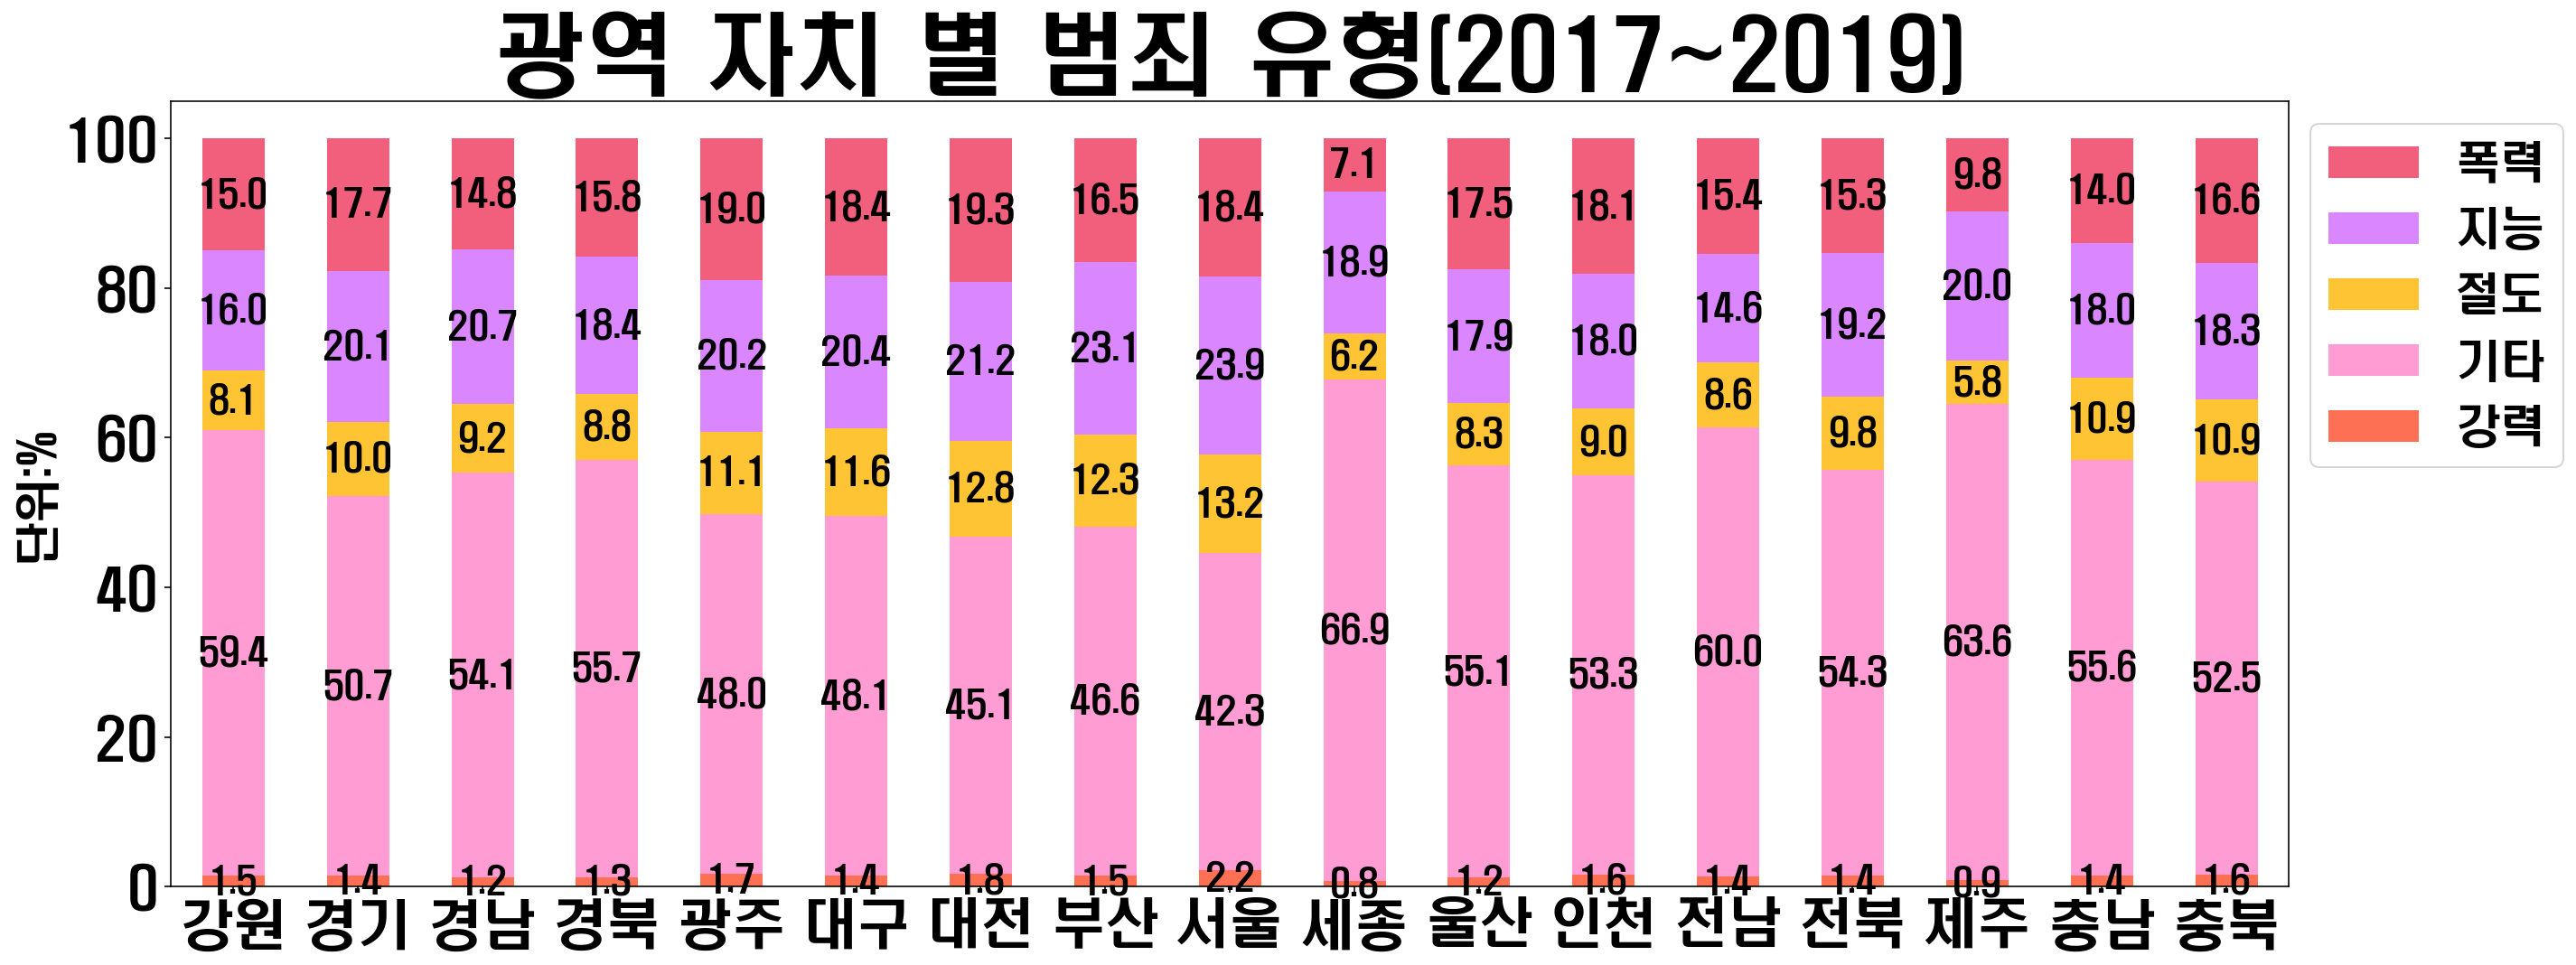

In [116]:
plt.rcParams["figure.figsize"] = (21,8)

b=df_434.plot(kind='bar',stacked=True,color=['#fe7054','#ff9cd3','#fec434','#da87ff','#f25f7d'])
plt.title('광역 자치 별 범죄 유형(2017~2019)', fontsize=50)
handles, labels = b.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='upper center', bbox_to_anchor=(1.07, 1), ncol=1,prop={'size': 25})


b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('', fontsize=25)
b.set_ylabel('단위:%', fontsize=25)
plt.setp(b.get_xticklabels(), rotation=0)

for p in b.patches:
    left, bottom, width, height = p.get_bbox().bounds
    b.annotate("%.1f"%(height), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=20)
#plt.sca(b)
#plt.box(False)

plt.savefig('4-3-4.png')

# 인구 밀도

## 인구 밀도 데이터 로드

In [54]:
df5 = pd.read_csv("./../data/인구밀도3.csv", sep=",",encoding='cp949')
df5 = df5.sort_values(by=['인구밀도(명/㎢)'],ascending=False)
df5_1 = pd.read_csv("./../data/인구밀도.csv", sep=",",encoding='cp949')

In [55]:
df5.columns = ['광역','기초','면적','성별합','남자','여자','인구밀도','인구증가율']
df5_1.columns = ['광역','기초','면적','성별합','남자','여자','인구밀도','인구증가율']

In [56]:
df5_1['기초2'] = df5_1['기초']

In [57]:
df5_1.head()

,광역,기초,면적,성별합,남자,여자,인구밀도,인구증가율,기초2
0,서울,종로구,23.91,154770,75967,78803,6472.27,1.33,종로구
1,서울,중구,9.96,125709,62253,63456,12621.65,0.37,중구
2,서울,용산구,21.87,229161,110878,118283,10480.02,-0.47,용산구
3,서울,성동구,16.86,304808,150368,154440,18082.00,1.85,성동구
4,서울,광진구,17.06,357703,174414,183289,20963.37,0.14,광진구


## 밀도 시각화

### 챠트에서 그려지는 지역의 x값 좌표를 df5_1의 idx값으로 가져오는 딕셔너리 작성

In [58]:
region_dict = dict()
region_idx = DataFrame(df5_1.광역.unique()).reset_index()
region_idx.columns = ['idx','광역']
region_dict = region_idx['광역'].to_dict()


region_dict  = {v:k for k,v in region_dict.items()}


E:\gon\IDE\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\gon\IDE\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\gon\IDE\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\gon\IDE\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\gon\IDE\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you

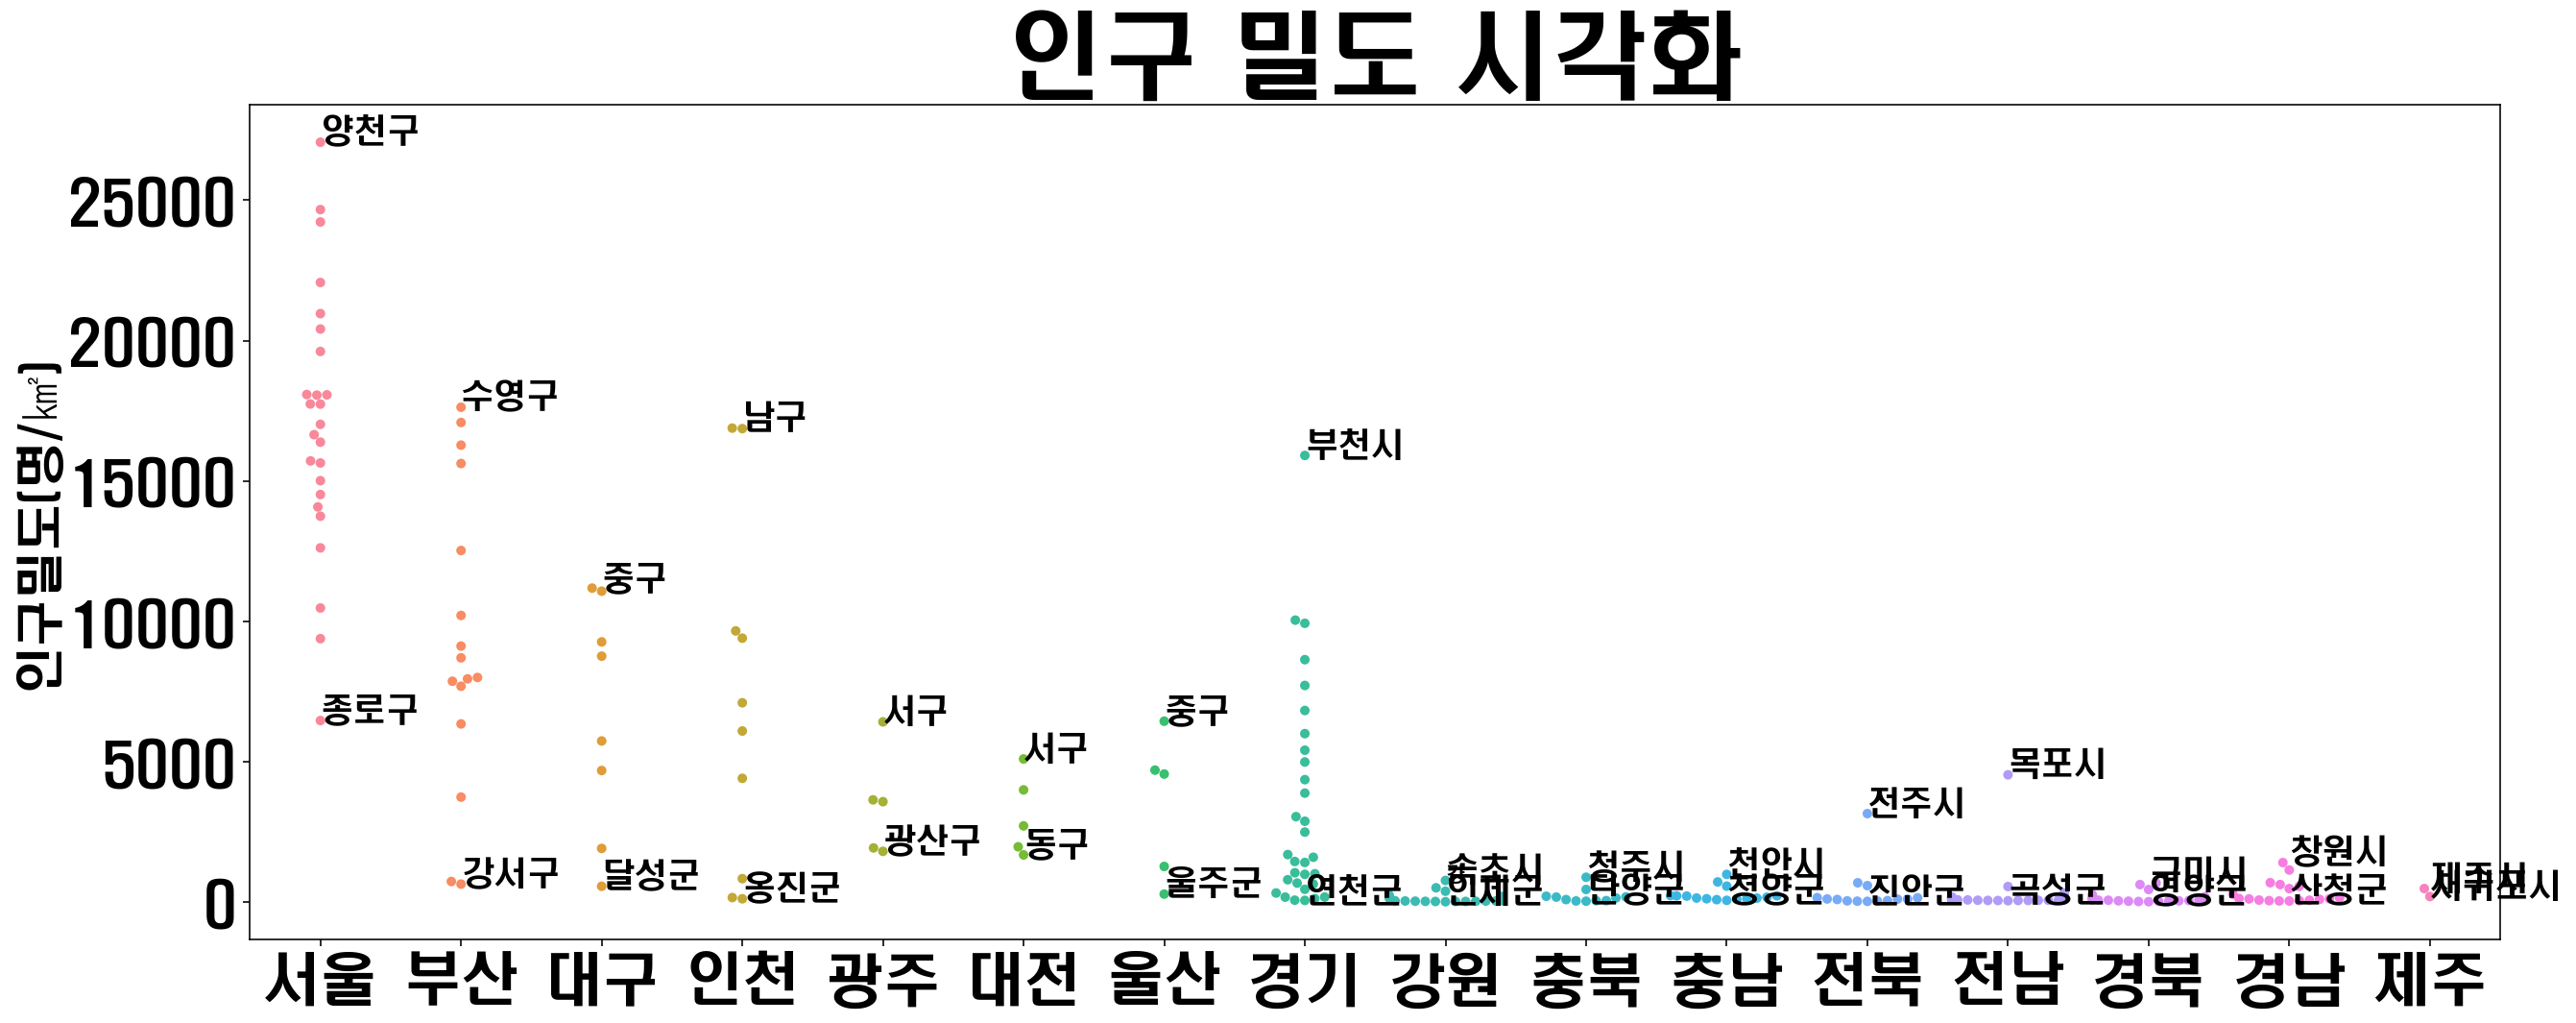

In [59]:
plt.title("인구 밀도 시각화", fontsize=50)

c=sns.swarmplot(x="광역", y="인구밀도", data=df5_1)
c.set_xlabel('', fontsize=25)
c.set_ylabel('인구밀도(명/㎢)', fontsize=25)
b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

regi_max = df5_1.loc[df5_1.groupby(['광역'])['인구밀도'].idxmax()]
regi_min = df5_1.loc[df5_1.groupby(['광역'])['인구밀도'].idxmin()]

regi_maxmin = pd.concat([regi_max, regi_min],axis=0)
regi_maxmin['광역idx'] = regi_maxmin['광역'].apply(lambda x: region_dict[x] )


for i in range(0,regi_maxmin.shape[0]):
    plt.text(regi_maxmin.iloc[i,-1], regi_maxmin.iloc[i,6], regi_maxmin.iloc[i,8] ,horizontalalignment='left', size='xx-large', color='black', weight='semibold')

#plt.text(0.1,20000,'캬라컁',horizontalalignment='left', size='large', color='black', weight='semibold')
#plt.text(regi_max.iloc[i,-1], regi_max.iloc[i,6], "컁",horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(8, 778.14, "컁",horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.savefig('5-2-1.png')
plt.show()

## 밀도와 범죄율 상관계수

### 기초 자치 기준 범죄 개수 

In [60]:
df_521 = df3.loc[df3['년도'].isin([2017])]
df_521.head()

,발생년월,경찰서,피해자(남자),피해자(여자),성별미상,00~06세,07~12세,13~15세,16~20세,21~30세,31~40세,41~50세,51~60세,61~세,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토,광역,기초,년도,총피해자
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,1,32,29,28,32,25,경기,의왕시,2017,205
1,201702,경기의왕경찰서,123,65,62,1,2,2,6,17,42,46,46,26,62,5,30,18,42,155,30,2,45,37,37,33,39,경기,의왕시,2017,250
2,201703,경기의왕경찰서,135,68,100,0,1,1,9,27,39,51,53,22,100,3,45,11,48,196,38,3,51,45,44,48,34,경기,의왕시,2017,303
3,201704,경기의왕경찰서,119,74,95,3,1,6,13,27,37,40,47,19,95,5,48,22,36,177,33,4,38,36,46,53,41,경기,의왕시,2017,288
4,201705,경기의왕경찰서,103,45,84,0,2,0,7,26,35,29,37,12,84,1,25,13,42,151,39,5,32,31,34,30,28,경기,의왕시,2017,232


In [61]:
df_521['경찰서']

0        경기의왕경찰서
1        경기의왕경찰서
2        경기의왕경찰서
3        경기의왕경찰서
4        경기의왕경찰서
          ...   
10041    인천논현경찰서
10042    인천논현경찰서
10043    인천논현경찰서
10068    충남태안경찰서
10069    충남태안경찰서
Name: 경찰서, Length: 3355, dtype: object

In [62]:
#강원속초경찰서 , 인천중부경찰서 , 전남목포경찰서, 충남논산경찰서 ,충북괴산경찰서
#는 기초 자치 일때는 뺀다. 경찰서 기준 로우데이터가 되어 있어 기초 자치 기준으로 뺄수 없어서 뻄

dropidx = df_521[df_521['경찰서'].isin(['강원속초경찰서' , '인천중부경찰서' , '전남목포경찰서', '충남논산경찰서' ,'충북괴산경찰서'])].index
df_521 = df_521.drop(dropidx)

In [63]:
df_521['기초'].count()

2570

In [64]:
df_521['기초2'] = df_521['기초'].apply(lambda x: str(x)[:str(x).rfind('시')+1] if str(x).rfind("시") != -1 else x)

In [65]:
df_521 = df_521.groupby(['광역','기초2'])['피해자(남자)','피해자(여자)','성별미상'].sum().reset_index()
df_521['발생건수'] =  df_521['피해자(남자)'] + df_521['피해자(여자)'] + df_521['성별미상']
df_521

<ipython-input-65-20492f4a0df5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_521 = df_521.groupby(['광역','기초2'])['피해자(남자)','피해자(여자)','성별미상'].sum().reset_index()


,광역,기초2,피해자(남자),피해자(여자),성별미상,발생건수
0,강원,강릉시,3238,1962,1664,6864
1,강원,고성군,394,198,370,962
2,강원,동해시,1214,812,842,2868
3,강원,삼척시,1003,680,917,2600
4,강원,양구군,209,109,148,466
...,...,...,...,...,...,...
192,충북,음성군,1579,810,1603,3992
193,충북,제천시,1815,1110,1146,4071
194,충북,진천군,1159,582,762,2503
195,충북,청주시,12516,7359,7994,27869


In [66]:
df_521['기초2'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '양구군', '영월군', '원주시', '인제군', '정선군',
       '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군', '가평군', '고양시',
       '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시',
       '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군', '여주시',
       '연천군', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군', '합천군',
       '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시',
       '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시', '예천군', '울릉군', '울진군',
       '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구', '남구', '동구', '북구', '서구',
       '달성군', '수성구', '중구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구',
       '사상구', '사하구', '영도구', '해운대구', '강동구', '강북구', '관악구', '광진구', '구로구',
       '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '성동구', '송파구',
       '양천구', '영등포구', '용산구', '세종시', '울주군', '강화군', '계양구', '남동구', '연수구',
       '강진

### 밀도와 범죄 원부 조인

In [67]:
df_522 = pd.merge(df_521, df5_1)
df_522['범죄피해율'] = round(df_522['발생건수'] * 100000 / df_522['성별합'],2)
df_522

,광역,기초2,피해자(남자),피해자(여자),성별미상,발생건수,기초,면적,성별합,남자,여자,인구밀도,인구증가율,범죄피해율
0,강원,강릉시,3238,1962,1664,6864,강릉시,1040.21,213952,106286,107666,205.68,0.05,3208.20
1,강원,고성군,394,198,370,962,고성군,664.28,30029,15817,14212,45.21,-0.28,3203.57
2,강원,동해시,1214,812,842,2868,동해시,180.21,92851,47067,45784,515.24,-0.48,3088.82
3,강원,삼척시,1003,680,917,2600,삼척시,1186.95,68514,34638,33876,57.72,-1.56,3794.84
4,강원,양구군,209,109,148,466,양구군,706.57,23835,12768,11067,33.73,-0.73,1955.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,충북,음성군,1579,810,1603,3992,음성군,520.23,97306,51156,46150,184.21,-0.49,4102.52
191,충북,제천시,1815,1110,1146,4071,제천시,883.40,136432,68428,68004,153.26,-0.06,2983.90
192,충북,진천군,1159,582,762,2503,진천군,407.25,73677,38314,35363,192.06,5.33,3397.26
193,충북,청주시,12516,7359,7994,27869,청주시,940.80,835590,419676,415914,890.46,0.05,3335.25


### 시각화

In [68]:
df_523 =  df_522.sort_values(['범죄피해율'],ascending=False)
df_523

,광역,기초2,피해자(남자),피해자(여자),성별미상,발생건수,기초,면적,성별합,남자,여자,인구밀도,인구증가율,범죄피해율
111,부산,중구,2193,1247,1404,4844,중구,2.83,44218,21662,22556,15624.73,-2.19,10954.81
97,대구,중구,2982,1881,1258,6121,중구,7.06,78986,38395,40591,11187.82,-0.91,7749.47
103,부산,동구,2259,1297,1788,5344,동구,9.74,88868,43927,44941,9124.02,-1.07,6013.41
89,광주,동구,2461,1420,1445,5326,동구,49.32,95448,47579,47869,1935.28,-0.36,5580.00
16,경기,가평군,1221,704,1349,3274,가평군,843.72,62973,32276,30697,74.64,0.84,5199.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,경북,봉화군,189,138,172,499,봉화군,1201.79,33259,16550,16709,27.67,-0.83,1500.35
79,경북,예천군,322,186,205,713,예천군,661.42,49253,24246,25007,74.47,6.69,1447.63
171,전북,진안군,169,80,130,379,진안군,789.10,26271,13149,13122,33.29,0.77,1442.66
58,경남,창원시,1931,1185,2040,5156,창원시,747.82,1057032,536167,520865,1413.48,-0.65,487.78


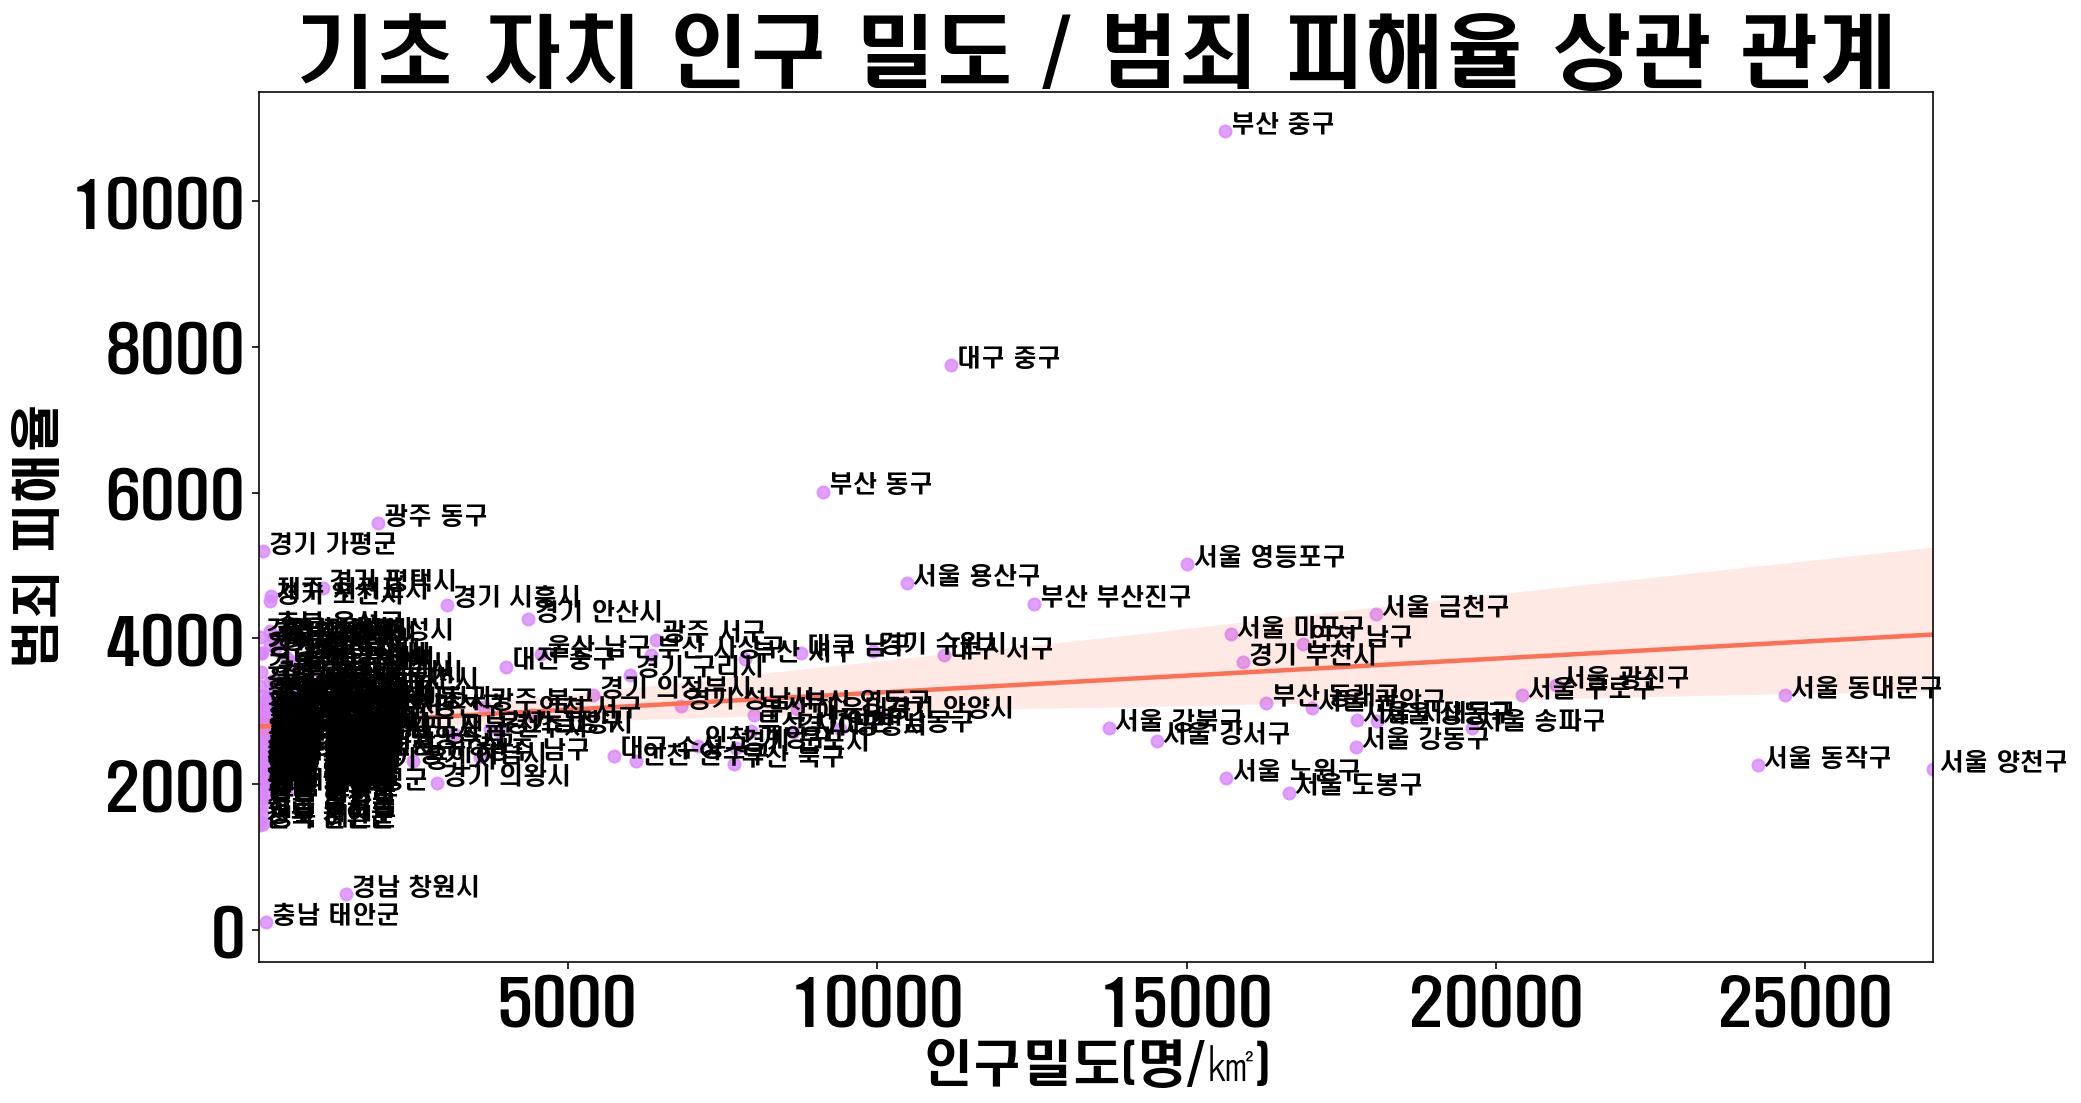

In [103]:
plt.figure(figsize=(15,8))
plt.title('기초 자치 인구 밀도 / 범죄 피해율 상관 관계', fontsize=40)
#plt.rc('xtick', labelsize=25)
#plt.rc('ytick', labelsize=25)

b=sns.regplot(data=df_523, x='인구밀도',y='범죄피해율',line_kws={"color": "#fe7054"},scatter_kws={"color": "#da87ff"})
type(b)
#b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('인구밀도(명/㎢)', fontsize=25)
b.set_ylabel('범죄 피해율 ', fontsize=25)

for line in range(0,df_523.shape[0]):
     plt.text(df_523.인구밀도[line]+100, df_523.범죄피해율[line], df_523.광역[line] +' ' + df_523.기초2[line], 
              horizontalalignment='left', size='large', color='black', weight='semibold')
        
plt.savefig('5-3-3.png')

### 광역으로 시각화

In [70]:
df_524 = df3.loc[df3['년도'].isin([2017])]
df_524.head()

df_524 = df_524.groupby(['광역'])['피해자(남자)','피해자(여자)','성별미상'].sum().reset_index()
df_524['발생건수'] =  df_524['피해자(남자)'] + df_524['피해자(여자)'] + df_524['성별미상']
df_524


<ipython-input-70-09c9adcbd7b9>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_524 = df_524.groupby(['광역'])['피해자(남자)','피해자(여자)','성별미상'].sum().reset_index()


,광역,피해자(남자),피해자(여자),성별미상,발생건수
0,강원,26064,15307,18299,59670
1,경기,178151,100419,139400,417970
2,경남,42628,24041,37612,104281
3,경북,34976,19765,26388,81129
4,광주,22847,12314,13002,48163
5,대구,35291,19360,20281,74932
6,대전,21646,13198,12100,46944
7,부산,52393,29792,37578,119763
8,서울,150644,90216,79015,319875
9,세종,2457,1306,1128,4891


In [71]:
df5

,광역,기초,면적,성별합,남자,여자,인구밀도,인구증가율
0,서울,소계,605.24,9857426,4830206,5027220,16286.73,-0.74
1,부산,소계,770.04,3470653,1709508,1761145,4507.11,-0.80
4,광주,소계,501.18,1463770,725295,738475,2920.65,-0.37
2,대구,소계,883.56,2475231,1227814,1247417,2801.43,-0.38
5,대전,소계,539.50,1502227,750969,751258,2784.48,-0.80
3,인천,소계,1063.09,2948542,1479597,1468945,2773.56,0.19
8,경기,소계,10186.62,12873895,6475323,6398572,1263.80,1.24
6,울산,소계,1061.18,1165132,599480,565652,1097.96,-0.61
7,세종,소계,465.00,280100,139734,140366,602.37,15.24
16,제주,소계,1850.16,657083,330823,326260,355.15,2.41


In [72]:
df_524 = pd.merge(df_524, df5)
df_524['범죄피해율'] = round(df_524['발생건수'] * 100000 / df_524['성별합'],2)
df_524

,광역,피해자(남자),피해자(여자),성별미상,발생건수,기초,면적,성별합,남자,여자,인구밀도,인구증가율,범죄피해율
0,강원,26064,15307,18299,59670,소계,16875.01,1550142,780635,769507,91.86,-0.04,3849.32
1,경기,178151,100419,139400,417970,소계,10186.62,12873895,6475323,6398572,1263.80,1.24,3246.65
2,경남,42628,24041,37612,104281,소계,10539.77,3380404,1701413,1678991,320.73,0.19,3084.87
3,경북,34976,19765,26388,81129,소계,19032.54,2691706,1353164,1338542,141.43,-0.32,3014.04
4,광주,22847,12314,13002,48163,소계,501.18,1463770,725295,738475,2920.65,-0.37,3290.34
5,대구,35291,19360,20281,74932,소계,883.56,2475231,1227814,1247417,2801.43,-0.38,3027.27
6,대전,21646,13198,12100,46944,소계,539.50,1502227,750969,751258,2784.48,-0.80,3124.96
7,부산,52393,29792,37578,119763,소계,770.04,3470653,1709508,1761145,4507.11,-0.80,3450.73
8,서울,150644,90216,79015,319875,소계,605.24,9857426,4830206,5027220,16286.73,-0.74,3245.02
9,세종,2457,1306,1128,4891,소계,465.00,280100,139734,140366,602.37,15.24,1746.16


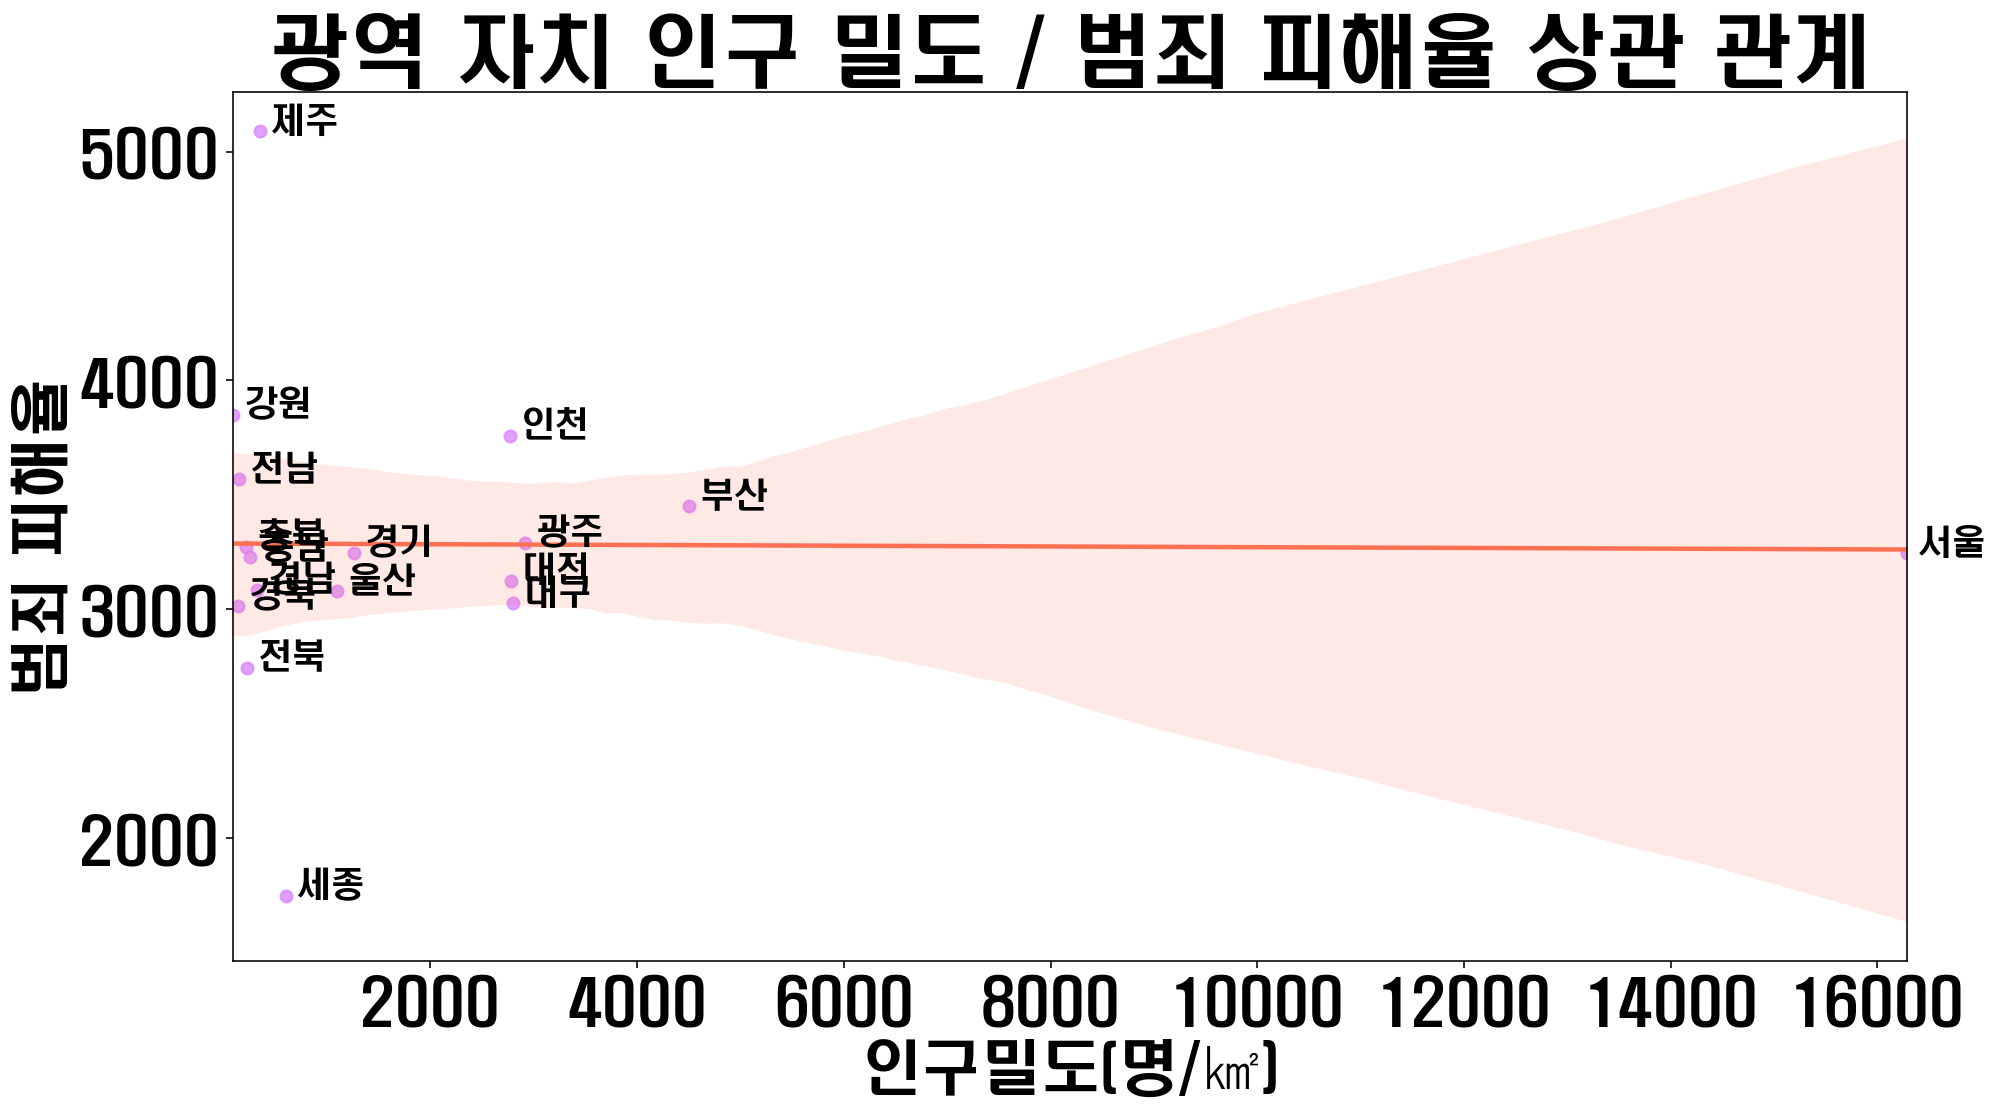

In [104]:
plt.figure(figsize=(15,8))
plt.title('광역 자치 인구 밀도 / 범죄 피해율 상관 관계', fontsize=40)

b=sns.regplot(data=df_524, x='인구밀도',y='범죄피해율',line_kws={"color": "#fe7054"},scatter_kws={"color": "#da87ff"})
type(b)
#b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('인구밀도(명/㎢)', fontsize=30)
b.set_ylabel('범죄 피해율 ', fontsize=30)

for line in range(0,df_524.shape[0]):
     plt.text(df_524.인구밀도[line]+100, df_524.범죄피해율[line], df_524.광역[line], 
              horizontalalignment='left', size='xx-large', color='black', weight='semibold')
        
plt.savefig('5-3-4.png')

# 1인 가구

## 1인 가구 로우 데이터 로드

In [74]:
df_61 = pd.read_csv("./../data/1인가구.csv", sep=",",encoding='cp949')
df_61

,년도,광역,기초,경찰서,시구only,연령,성별,가구수
0,2017,경기,가평군,경기가평경찰서,가평군,16~20세,남자,8
1,2017,경기,가평군,경기가평경찰서,가평군,21~30세,남자,391
2,2017,경기,가평군,경기가평경찰서,가평군,21~30세,여자,189
3,2017,경기,가평군,경기가평경찰서,가평군,31~40세,남자,477
4,2017,경기,가평군,경기가평경찰서,가평군,31~40세,여자,243
...,...,...,...,...,...,...,...,...
7900,2019,충북,청주시 흥덕구,NaN,흥덕구,41~50세,여자,2087
7901,2019,충북,청주시 흥덕구,NaN,흥덕구,51~60세,남자,2989
7902,2019,충북,청주시 흥덕구,NaN,흥덕구,51~60세,여자,2577
7903,2019,충북,청주시 흥덕구,NaN,흥덕구,61~세,남자,2449


## 1인가구용 범죄 원부 데이터

In [75]:
df_444

,년도,광역,기초,경찰서,발생건수,연령
0,2017,경기,의왕시,경기의왕경찰서,0,00~06세
1,2017,경기,의왕시,경기의왕경찰서,1,00~06세
2,2017,경기,의왕시,경기의왕경찰서,0,00~06세
3,2017,경기,의왕시,경기의왕경찰서,3,00~06세
4,2017,경기,의왕시,경기의왕경찰서,0,00~06세
...,...,...,...,...,...,...
10164,2019,경기,화성시,경기화성동탄경찰서,185,나이미상
10165,2019,경기,화성시,경기화성동탄경찰서,245,나이미상
10166,2019,경기,화성시,경기화성동탄경찰서,293,나이미상
10167,2019,경기,화성시,경기화성동탄경찰서,231,나이미상


In [76]:
df_62 = df_444.groupby(['년도','광역','기초','경찰서','연령']).sum().reset_index()
df_62

,년도,광역,기초,경찰서,연령,발생건수
0,2017,강원,강릉시,강원강릉경찰서,00~06세,15
1,2017,강원,강릉시,강원강릉경찰서,07~12세,34
2,2017,강원,강릉시,강원강릉경찰서,13~15세,54
3,2017,강원,강릉시,강원강릉경찰서,16~20세,319
4,2017,강원,강릉시,강원강릉경찰서,21~30세,738
...,...,...,...,...,...,...
6795,2019,충북,충주시,충북충주경찰서,31~40세,804
6796,2019,충북,충주시,충북충주경찰서,41~50세,979
6797,2019,충북,충주시,충북충주경찰서,51~60세,1151
6798,2019,충북,충주시,충북충주경찰서,61~세,824


## 1인가구 연령 분석

### 연령별 데이터셋

In [77]:
df_631 = df_61.groupby(['년도','광역','기초','경찰서','연령']).sum().reset_index()
df_631

,년도,광역,기초,경찰서,연령,가구수
0,2017,강원,강릉시,강원강릉경찰서,16~20세,529
1,2017,강원,강릉시,강원강릉경찰서,21~30세,7601
2,2017,강원,강릉시,강원강릉경찰서,31~40세,2940
3,2017,강원,강릉시,강원강릉경찰서,41~50세,3562
4,2017,강원,강릉시,강원강릉경찰서,51~60세,5056
...,...,...,...,...,...,...
3466,2019,충북,진천군,충북진천경찰서,21~30세,1568
3467,2019,충북,진천군,충북진천경찰서,31~40세,1810
3468,2019,충북,진천군,충북진천경찰서,41~50세,1699
3469,2019,충북,진천군,충북진천경찰서,51~60세,1948


### 조인

In [78]:
df_632 = pd.merge(df_62, df_631)
df_632

,년도,광역,기초,경찰서,연령,발생건수,가구수
0,2017,강원,강릉시,강원강릉경찰서,16~20세,319,529
1,2017,강원,강릉시,강원강릉경찰서,21~30세,738,7601
2,2017,강원,강릉시,강원강릉경찰서,31~40세,820,2940
3,2017,강원,강릉시,강원강릉경찰서,41~50세,1196,3562
4,2017,강원,강릉시,강원강릉경찰서,51~60세,1195,5056
...,...,...,...,...,...,...,...
3286,2019,충북,진천군,충북진천경찰서,21~30세,245,1568
3287,2019,충북,진천군,충북진천경찰서,31~40세,364,1810
3288,2019,충북,진천군,충북진천경찰서,41~50세,451,1699
3289,2019,충북,진천군,충북진천경찰서,51~60세,427,1948


### 1인가구수와 발생 건수의 연관 분석

In [79]:
df_633 = pd.merge(df_632, df4.groupby(['년도','광역','기초','경찰서','연령']).sum().reset_index())
df_633


,년도,광역,기초,경찰서,연령,발생건수,가구수,인구수
0,2017,강원,강릉시,강원강릉경찰서,16~20세,319,529,16058
1,2017,강원,강릉시,강원강릉경찰서,21~30세,738,7601,27644
2,2017,강원,강릉시,강원강릉경찰서,31~40세,820,2940,24277
3,2017,강원,강릉시,강원강릉경찰서,41~50세,1196,3562,34129
4,2017,강원,강릉시,강원강릉경찰서,51~60세,1195,5056,36577
...,...,...,...,...,...,...,...,...
3286,2019,충북,진천군,충북진천경찰서,21~30세,245,1568,11095
3287,2019,충북,진천군,충북진천경찰서,31~40세,364,1810,14347
3288,2019,충북,진천군,충북진천경찰서,41~50세,451,1699,14028
3289,2019,충북,진천군,충북진천경찰서,51~60세,427,1948,13732


In [80]:
df_633

,년도,광역,기초,경찰서,연령,발생건수,가구수,인구수
0,2017,강원,강릉시,강원강릉경찰서,16~20세,319,529,16058
1,2017,강원,강릉시,강원강릉경찰서,21~30세,738,7601,27644
2,2017,강원,강릉시,강원강릉경찰서,31~40세,820,2940,24277
3,2017,강원,강릉시,강원강릉경찰서,41~50세,1196,3562,34129
4,2017,강원,강릉시,강원강릉경찰서,51~60세,1195,5056,36577
...,...,...,...,...,...,...,...,...
3286,2019,충북,진천군,충북진천경찰서,21~30세,245,1568,11095
3287,2019,충북,진천군,충북진천경찰서,31~40세,364,1810,14347
3288,2019,충북,진천군,충북진천경찰서,41~50세,451,1699,14028
3289,2019,충북,진천군,충북진천경찰서,51~60세,427,1948,13732


### 시각화

In [81]:
dropidx = df_633[df_633['경찰서'].isin(['강원속초경찰서' , '인천중부경찰서' , '전남목포경찰서', '충남논산경찰서' ,'충북괴산경찰서'])].index
df_6341 = df_633.drop(dropidx)

df_6341 = df_6341.groupby(['광역','기초']).sum().reset_index()
df_6341['범죄피해율'] =  round(df_6341['발생건수']*100000 / df_6341['인구수'],2)
df_6341
#df_6341.to_csv('1인가구다.csv',encoding='cp949')

df_6341_max = df_6341.loc[df_6341.groupby(['기초'])['가구수'].idxmax()].sort_values(['가구수'],ascending=False).head().reset_index()
df_6341_max

,index,광역,기초,년도,발생건수,가구수,인구수,범죄피해율
0,104,서울,관악구,36324,32781,339459,1398400,2344.18
1,28,경기,부천시,36324,12902,231918,2207391,584.49
2,115,서울,송파구,36324,42129,191157,1664413,2531.16
3,111,서울,동작구,36324,21497,171315,1069726,2009.58
4,112,서울,마포구,36324,31714,170246,976417,3248.00


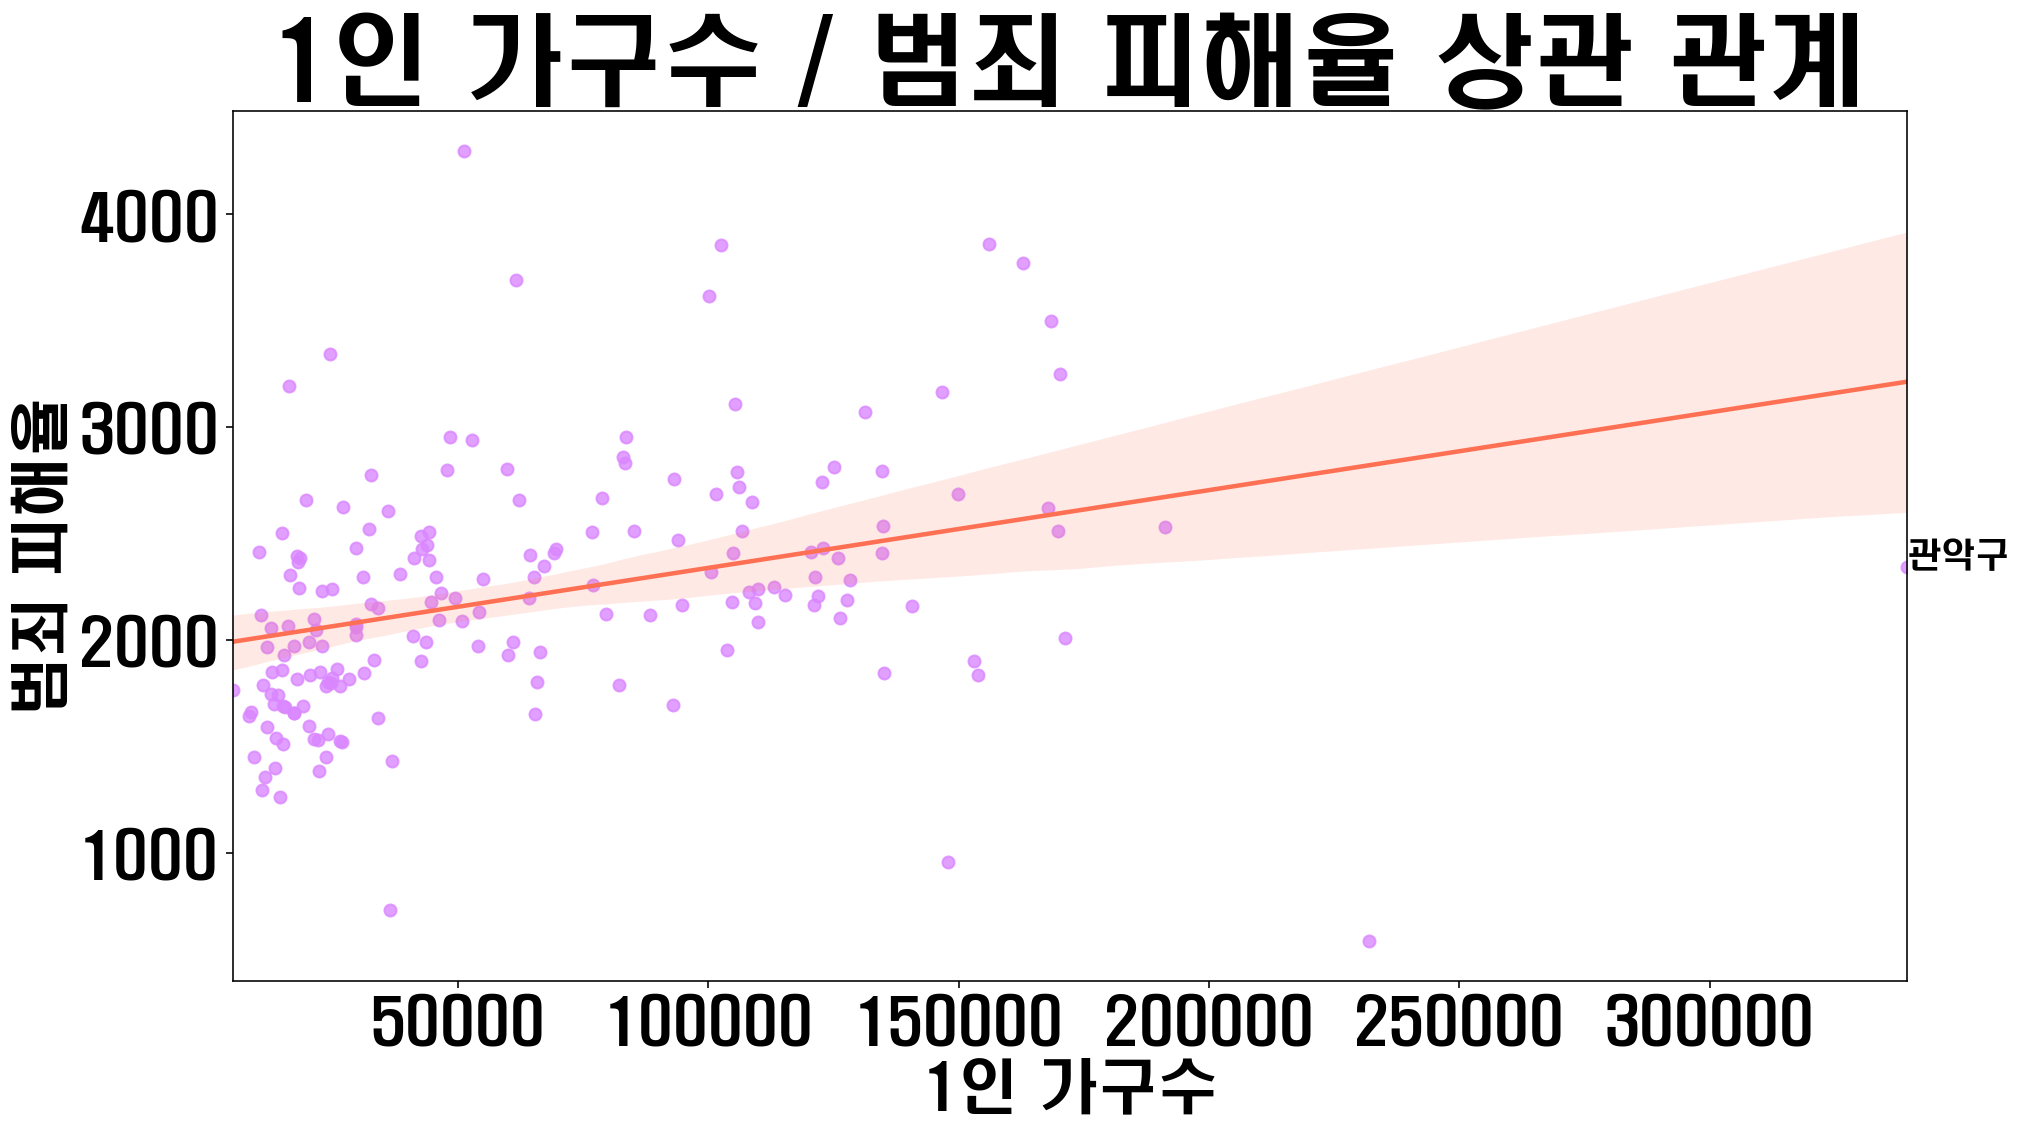

In [101]:
plt.figure(figsize=(15,8))
plt.title('1인 가구수 / 범죄 피해율 상관 관계', fontsize=50)

b=sns.regplot(data=df_6341, x='가구수',y='범죄피해율',line_kws={"color": "#fe7054"},scatter_kws={"color": "#da87ff"})

plt.text(df_6341_max.가구수[0]-100, df_6341_max.범죄피해율[0], df_6341_max.기초[0], 
               horizontalalignment='left', size='xx-large', color='black', weight='semibold')

#b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('1인 가구수', fontsize=30)
b.set_ylabel('범죄 피해율 ', fontsize=30)

plt.savefig('6-3-4-1.png')

In [83]:
df_6341

,광역,기초,년도,발생건수,가구수,인구수,범죄피해율
0,강원,강릉시,36324,14140,93911,571984,2472.10
1,강원,고성군,36324,1582,36365,215962,732.54
2,강원,동해시,36324,5199,31031,226439,2295.98
3,강원,삼척시,36324,4584,32196,181662,2523.37
4,강원,양구군,30270,893,8529,53789,1660.19
...,...,...,...,...,...,...,...
174,충북,보은군,30270,1467,14018,84147,1743.38
175,충북,영동군,36324,2017,21905,131932,1528.82
176,충북,옥천군,36324,2214,17241,133422,1659.40
177,충북,음성군,36324,6939,42522,278872,2488.24


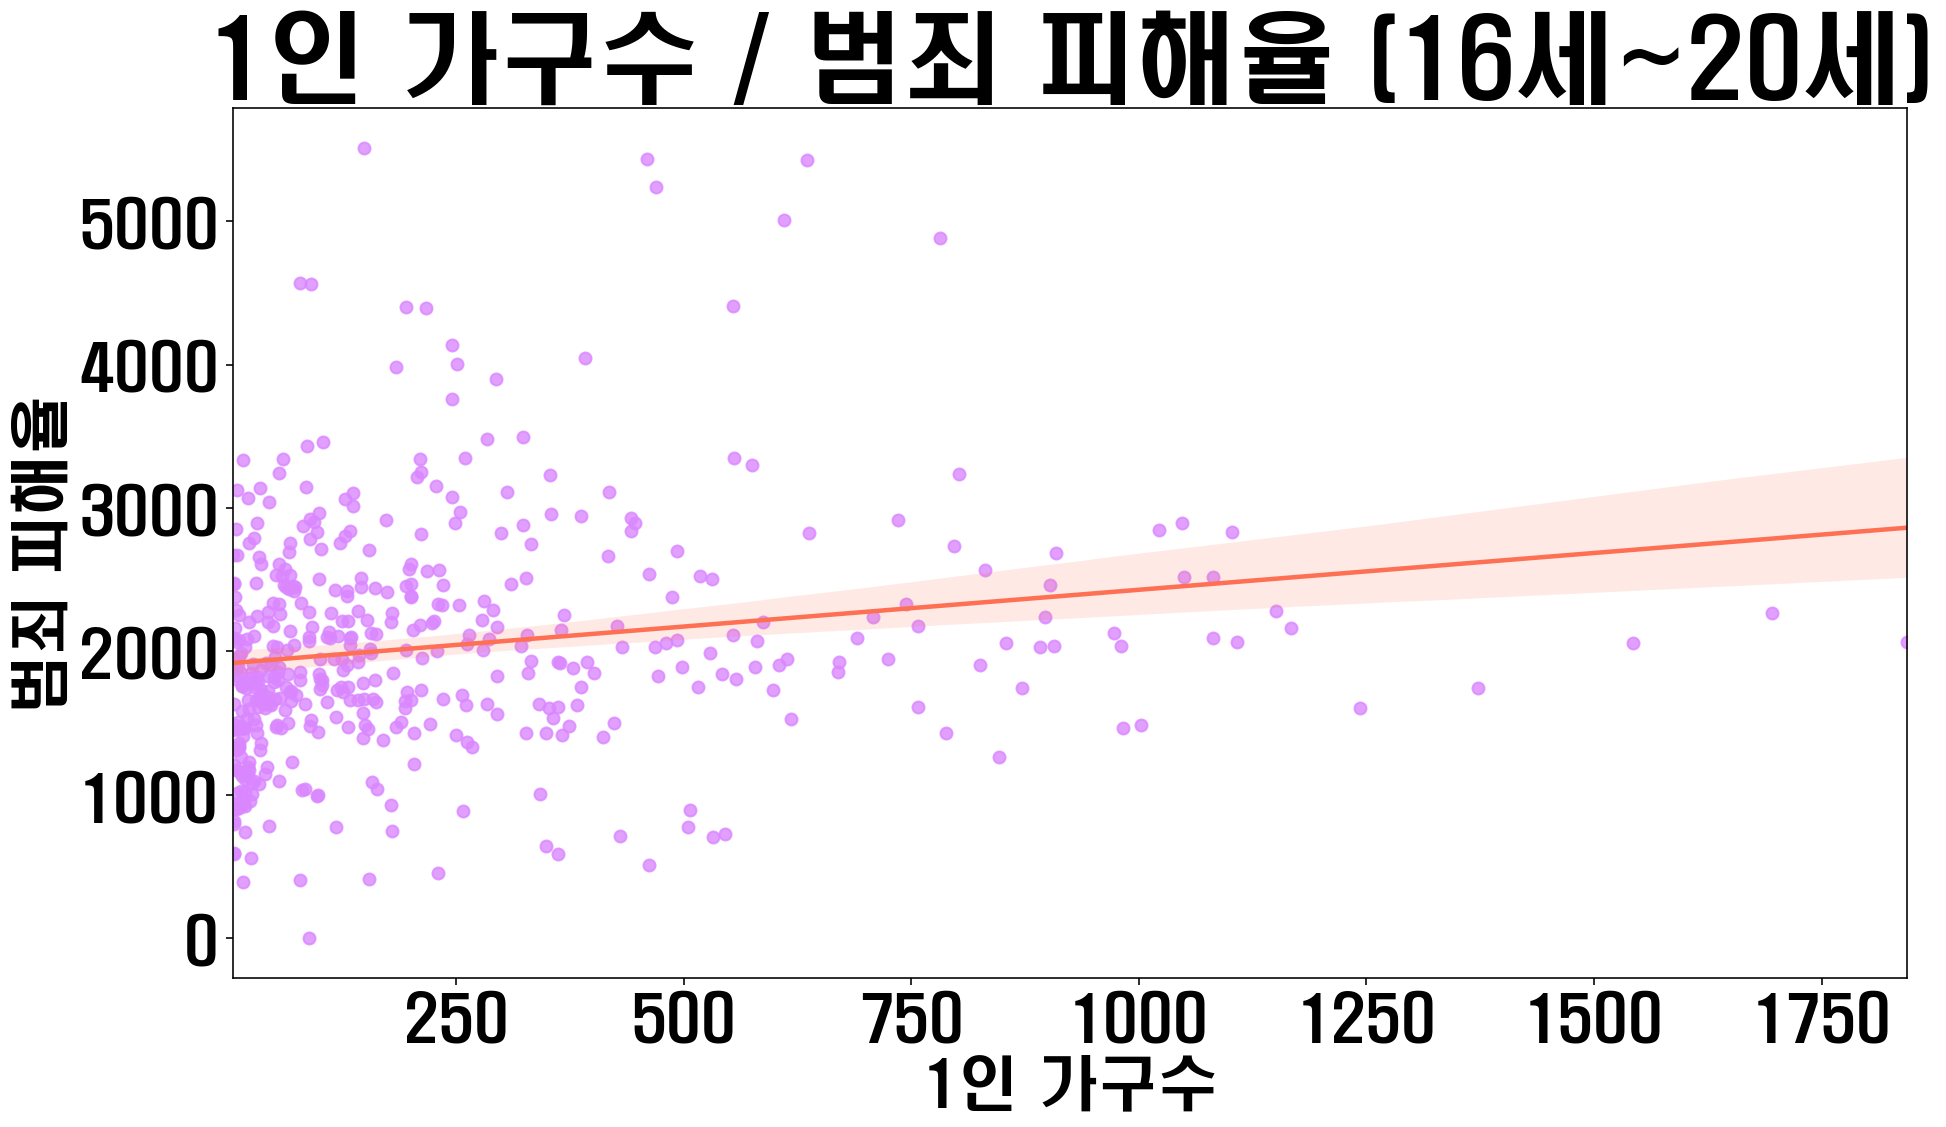

In [102]:
dropidx = df_633[df_633['경찰서'].isin(['강원속초경찰서' , '인천중부경찰서' , '전남목포경찰서', '충남논산경찰서' ,'충북괴산경찰서'])].index
df_6342 = df_633.drop(dropidx)
df_6342 = df_6342[df_6342['연령'].isin(['16~20세'])]
df_6342['범죄피해율'] =  round(df_6342['발생건수']*100000 / df_6342['인구수'],2)

plt.figure(figsize=(15,8))
plt.title('1인 가구수 / 범죄 피해율 (16세~20세)', fontsize=50)

b=sns.regplot(data=df_6342, x='가구수',y='범죄피해율',line_kws={"color": "#fe7054"},scatter_kws={"color": "#da87ff"})
type(b)
#b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('1인 가구수', fontsize=30)
b.set_ylabel('범죄 피해율 ', fontsize=30)

# for line in range(0,df_633.shape[0]):
#      plt.text(df_633.인구밀도[line]+100, df_524.범죄피해율[line], df_524.광역[line], 
#               horizontalalignment='left', size='xx-large', color='black', weight='semibold')
        
plt.savefig('6-3-4-2.png')

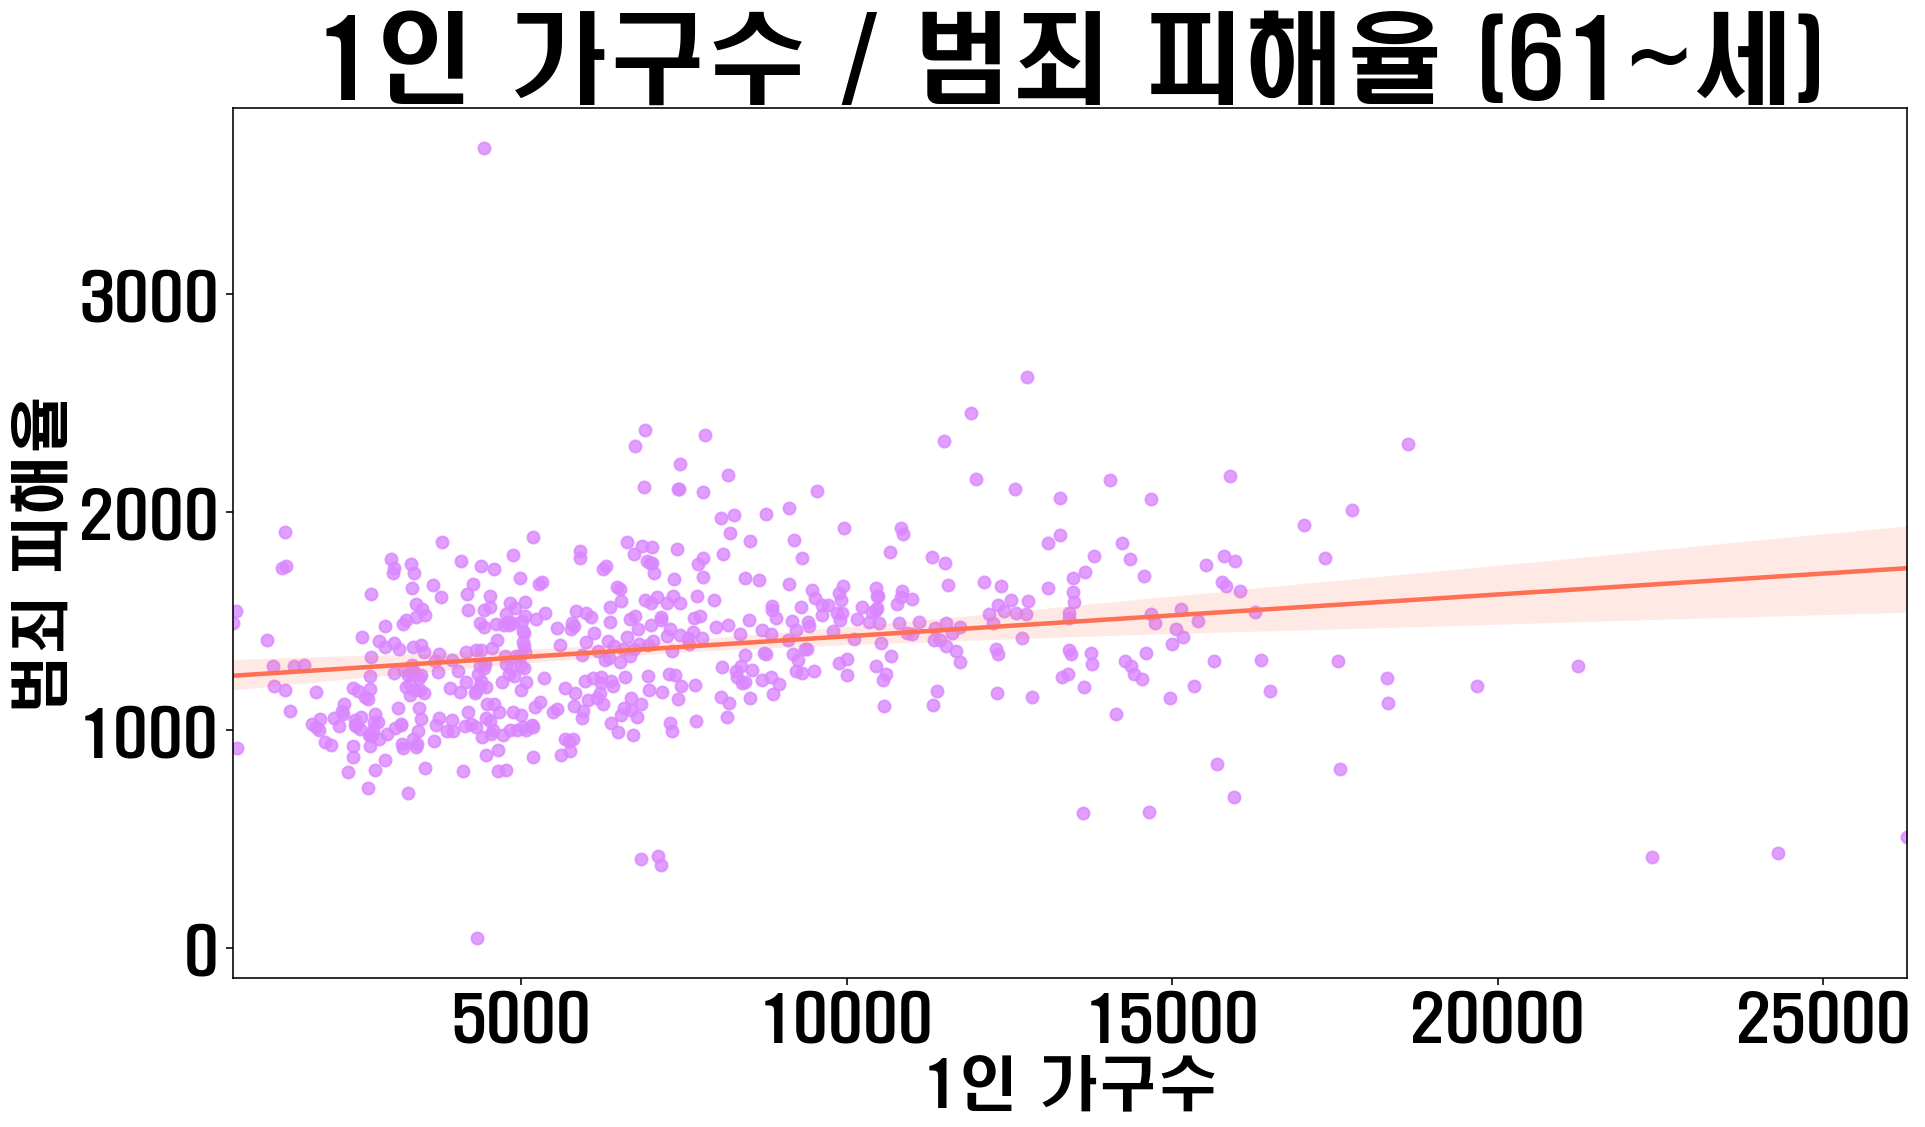

In [99]:
dropidx = df_633[df_633['경찰서'].isin(['강원속초경찰서' , '인천중부경찰서' , '전남목포경찰서', '충남논산경찰서' ,'충북괴산경찰서'])].index
df_6343 = df_633.drop(dropidx)
df_6343 = df_6343[df_6343['연령'].isin(['61~세'])]
df_6343['범죄피해율'] =  round(df_6343['발생건수']*100000 / df_6343['인구수'],2)

plt.figure(figsize=(15,8))
plt.title('1인 가구수 / 범죄 피해율 (61~세)', fontsize=50)

b=sns.regplot(data=df_6343, x='가구수',y='범죄피해율',line_kws={"color": "#fe7054"},scatter_kws={"color": "#da87ff"})
type(b)
#b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('1인 가구수', fontsize=30)
b.set_ylabel('범죄 피해율 ', fontsize=30)

# for line in range(0,df_633.shape[0]):
#      plt.text(df_633.인구밀도[line]+100, df_524.범죄피해율[line], df_524.광역[line], 
#               horizontalalignment='left', size='xx-large', color='black', weight='semibold')
        
plt.savefig('6-3-4-3.png')